<center>
<img src="https://laelgelcpublic.s3.sa-east-1.amazonaws.com/lael_50_years_narrow_white.png.no_years.400px_96dpi.png" width="300" alt="LAEL 50 years logo">
<h3>APPLIED LINGUISTICS GRADUATE PROGRAMME (LAEL)</h3>
</center>
<hr>

# Corpus Linguistics - Study 1 - Phase 1 - INRS

# [US Presidential and Vice Presidential debates](https://www.debates.org/voter-education/debate-transcripts/) _corpus_ compilation via web scraping

This solution captures the texts on the data source's web pages using `Beautiful Soup`, performs data wrangling and generates output documents.

Each output document was manually inspected for inconsistencies and corrections, when needed, were implemented to the respective piece of code.

Each debate transcription is regarded as a single text characterised as a series of turns of speach of the candidates mediated by a mediator. Each text is named after the title of the debate, is coded as UTF-8 LF and is presented in both JSONL and TSV format. The data is structured as one paragraph per row organised according to the following columns:

- **Title**: The title of the debate
- **Debate**: A description of the debate
- **Date**: The date when the debate took place
- **Participants**: The candidates who participated in the debate
- **Moderators**: The moderators of the debate
- **Speaker**: The person who spoke the paragraph
- **Text**: The transcribed speech of the person

## What is `Beautiful Soup`?

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It is a well-known library for web scraping.

Please refer to:
- [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/)
- [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [How To Scrape Web Pages with Beautiful Soup and Python 3](https://www.digitalocean.com/community/tutorials/how-to-scrape-web-pages-with-beautiful-soup-and-python-3)
- [A Practical Introduction to Web Scraping in Python](https://realpython.com/python-web-scraping-practical-introduction/)

## Required Python packages

- beautifulsoup4
- lxml
- pandas
- matplotlib
- requests

## Importing the required libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import os
import sys

## Capturing the debate transcript urls

In [2]:
url = 'https://www.debates.org/voter-education/debate-transcripts/'
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Find all anchor tags within the blockquote
    for anchor in soup.find_all('a'):
        print(f"{anchor.text}: {anchor.get('href')}")  # Print text content and href attribute

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

Home: /
About CPD: /about-cpd/
Debate History: /debate-history/
News: /news/
DebateWatch: /debatewatch/
Voter Education: /voter-education/
International: /international/
Media: /media/
Debate Videos: /voter-education/debate-videos/
Debate Transcripts: /voter-education/debate-transcripts/
October 07, 2020 Vice Presidential Debate Transcript: /voter-education/debate-transcripts/vice-presidential-debate-at-the-university-of-utah-in-salt-lake-city-utah/
October 22, 2020 Debate Transcript: /voter-education/debate-transcripts/october-22-2020-debate-transcript/
September 29, 2020 Debate Transcript: /voter-education/debate-transcripts/september-29-2020-debate-transcript/
October 19, 2016 Debate Transcript: /voter-education/debate-transcripts/october-19-2016-debate-transcript/
October 9, 2016 Debate Transcript: /voter-education/debate-transcripts/october-9-2016-debate-transcript/
October 4, 2016 Debate Transcript: /voter-education/debate-transcripts/october-4-2016-debate-transcript/
September 2

### Defining input variables

In [3]:
# Debate Transcripts
debate_1 = 'September 29, 2020 Debate Transcript'
debate_url_1 = 'https://www.debates.org/voter-education/debate-transcripts/september-29-2020-debate-transcript/'

debate_2 = 'October 07, 2020 Vice Presidential Debate Transcript'
debate_url_2 = 'https://www.debates.org/voter-education/debate-transcripts/vice-presidential-debate-at-the-university-of-utah-in-salt-lake-city-utah/'

debate_3 = 'October 22, 2020 Debate Transcript'
debate_url_3 = 'https://www.debates.org/voter-education/debate-transcripts/october-22-2020-debate-transcript/'

debate_4 = 'September 26, 2016 Debate Transcript'
debate_url_4 = 'https://www.debates.org/voter-education/debate-transcripts/september-26-2016-debate-transcript/'

debate_5 = 'October 4, 2016 Debate Transcript'
debate_url_5 = 'https://www.debates.org/voter-education/debate-transcripts/october-4-2016-debate-transcript/'

debate_6 = 'October 9, 2016 Debate Transcript'
debate_url_6 = 'https://www.debates.org/voter-education/debate-transcripts/october-9-2016-debate-transcript/'

debate_7 = 'October 19, 2016 Debate Transcript'
debate_url_7 = 'https://www.debates.org/voter-education/debate-transcripts/october-19-2016-debate-transcript/'

debate_8 = 'October 3, 2012 Debate Transcript'
debate_url_8 = 'https://www.debates.org/voter-education/debate-transcripts/october-3-2012-debate-transcript/'

debate_9 = 'October 11, 2012 Debate Transcript'
debate_url_9 = 'https://www.debates.org/voter-education/debate-transcripts/october-11-2012-the-biden-romney-vice-presidential-debate/'

debate_10 = 'October 16, 2012 Debate Transcript'
debate_url_10 = 'https://www.debates.org/voter-education/debate-transcripts/october-16-2012-the-second-obama-romney-presidential-debate/'

debate_11 = 'October 22, 2012 Debate Transcript'
debate_url_11 = 'https://www.debates.org/voter-education/debate-transcripts/october-22-2012-the-third-obama-romney-presidential-debate/'

debate_12 = 'September 26, 2008 Debate Transcript'
debate_url_12 = 'https://www.debates.org/voter-education/debate-transcripts/2008-debate-transcript/'

debate_13 = 'October 2, 2008 Debate Transcript'
debate_url_13 = 'https://www.debates.org/voter-education/debate-transcripts/2008-debate-transcript-2/'

debate_14 = 'October 7, 2008 Debate Transcript'
debate_url_14 = 'https://www.debates.org/voter-education/debate-transcripts/october-7-2008-debate-transcrip/'

debate_15 = 'October 15, 2008 Debate Transcript'
debate_url_15 = 'https://www.debates.org/voter-education/debate-transcripts/october-15-2008-debate-transcript/'

debate_16 = 'October 13, 2004 Debate Transcript'
debate_url_16 = 'https://www.debates.org/voter-education/debate-transcripts/october-13-2004-debate-transcript/'

debate_17 = 'October 8, 2004 Debate Transcript'
debate_url_17 = 'https://www.debates.org/voter-education/debate-transcripts/october-8-2004-debate-transcript/'

debate_18 = 'October 5, 2004 Transcript'
debate_url_18 = 'https://www.debates.org/voter-education/debate-transcripts/october-5-2004-transcript/'

debate_19 = 'September 30, 2004 Debate Transcript'
debate_url_19 = 'https://www.debates.org/voter-education/debate-transcripts/september-30-2004-debate-transcript/'

debate_20 = 'October 3, 2000 Transcript'
debate_url_20 = 'https://www.debates.org/voter-education/debate-transcripts/october-3-2000-transcript/'

debate_21 = 'October 5, 2000 Debate Transcript'
debate_url_21 = 'https://www.debates.org/voter-education/debate-transcripts/october-5-2000-debate-transcript/'

debate_22 = 'October 11, 2000 Debate Transcript'
debate_url_22 = 'https://www.debates.org/voter-education/debate-transcripts/october-11-2000-debate-transcript/'

debate_23 = 'October 17, 2000 Debate Transcript'
debate_url_23 = 'https://www.debates.org/voter-education/debate-transcripts/october-17-2000-debate-transcript/'

debate_24 = 'October 6, 1996 Debate Transcript'
debate_url_24 = 'https://www.debates.org/voter-education/debate-transcripts/october-6-1996-debate-transcript/'

debate_25 = 'October 9, 1996 Debate Transcript'
debate_url_25 = 'https://www.debates.org/voter-education/debate-transcripts/october-9-1996-debate-transcript/'

debate_26 = 'October 16, 1996 Debate Transcript'
debate_url_26 = 'https://www.debates.org/voter-education/debate-transcripts/october-16-1996-debate-transcript/'

debate_27 = 'October 11, 1992 First Half Debate Transcript'
debate_url_27 = 'https://www.debates.org/voter-education/debate-transcripts/october-11-1992-first-half-debate-transcript/'

debate_28 = 'October 11, 1992 Second Half Debate Transcript'
debate_url_28 = 'https://www.debates.org/voter-education/debate-transcripts/october-11-1992-second-half-debate-transcript/'

debate_29 = 'October 13, 1992 Debate Transcript'
debate_url_29 = 'https://www.debates.org/voter-education/debate-transcripts/october-13-1992-debate-transcript/'

debate_30 = 'October 15, 1992 First Half Debate Transcript'
debate_url_30 = 'https://www.debates.org/voter-education/debate-transcripts/october-15-1992-first-half-debate-transcript/'

debate_31 = 'October 15, 1992 Second Half Debate Transcript'
debate_url_31 = 'https://www.debates.org/voter-education/debate-transcripts/october-15-1992-second-half-debate-transcript/'

debate_32 = 'October 19, 1992 Debate Transcript'
debate_url_32 = 'https://www.debates.org/voter-education/debate-transcripts/october-19-1992-debate-transcript/'

debate_33 = 'September 25, 1988 Debate Transcript'
debate_url_33 = 'https://www.debates.org/voter-education/debate-transcripts/september-25-1988-debate-transcript/'

debate_34 = 'October 5, 1988 Debate Transcripts'
debate_url_34 = 'https://www.debates.org/voter-education/debate-transcripts/october-5-1988-debate-transcripts/'

debate_35 = 'October 13, 1988 Debate Transcript'
debate_url_35 = 'https://www.debates.org/voter-education/debate-transcripts/october-13-1988-debate-transcript/'

debate_36 = 'October 7, 1984 Debate Transcript'
debate_url_36 = 'https://www.debates.org/voter-education/debate-transcripts/october-7-1984-debate-transcript/'

debate_37 = 'October 11, 1984 Debate Transcript'
debate_url_37 = 'https://www.debates.org/voter-education/debate-transcripts/october-11-1984-debate-transcript/'

debate_38 = 'October 21, 1984 Debate Transcript'
debate_url_38 = 'https://www.debates.org/voter-education/debate-transcripts/october-21-1984-debate-transcript/'

debate_39 = 'September 21, 1980 Debate Transcript'
debate_url_39 = 'https://www.debates.org/voter-education/debate-transcripts/september-21-1980-debate-transcript/'

debate_40 = 'October 28, 1980 Debate Transcript'
debate_url_40 = 'https://www.debates.org/voter-education/debate-transcripts/october-28-1980-debate-transcript/'

debate_41 = 'September 23, 1976 Debate Transcript'
debate_url_41 = 'https://www.debates.org/voter-education/debate-transcripts/september-23-1976-debate-transcript/'

debate_42 = 'October 6, 1976 Debate Transcript'
debate_url_42 = 'https://www.debates.org/voter-education/debate-transcripts/october-6-1976-debate-transcript/'

debate_43 = 'October 22, 1976 Debate Transcript'
debate_url_43 = 'https://www.debates.org/voter-education/debate-transcripts/october-22-1976-debate-transcript/'

debate_44 = 'September 26, 1960 Debate Transcript'
debate_url_44 = 'https://www.debates.org/voter-education/debate-transcripts/september-26-1960-debate-transcript/'

debate_45 = 'October 7, 1960 Debate Transcript'
debate_url_45 = 'https://www.debates.org/voter-education/debate-transcripts/october-7-1960-debate-transcript/'

debate_46 = 'October 13, 1960 Debate Transcript'
debate_url_46 = 'https://www.debates.org/voter-education/debate-transcripts/october-13-1960-debate-transcript/'

debate_47 = 'October 21, 1960 Debate Transcript'
debate_url_47 = 'https://www.debates.org/voter-education/debate-transcripts/october-21-1960-debate-transcript/'

output_directory = 'cl_st1_inrs'

### Creating output directory

In [4]:
# Check if the output directory already exists. If it does, do nothing. If it doesn't exist, create it.
if os.path.exists(output_directory):
    print('Output directory already exists.')
else:
    try:
        os.makedirs(output_directory)
        print('Output directory successfully created.')
    except OSError as e:
        print('Failed to create the directory:', e)
        sys.exit(1)

Output directory successfully created.


## Debate 1

### Importing the text into a dataframe

In [5]:
debate_title = debate_1
url = debate_url_1
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [6]:
df

,Text
0,"September 29, 2020 Debate Transcript"
1,Presidential Debate at Case Western Reserve Un...
2,"September 29, 2020"
3,PARTICIPANTS:\nFormer Vice President Joe Biden...
4,MODERATOR:\nChris Wallace (Fox News)
...,...
874,TRUMP: I want to see an honest ballot count.
875,WALLACE: We’re going to leave it there. . .
876,TRUMP: And I think he does too. . .
877,WALLACE: … to be continued in more debates as ...


In [7]:
df.head(10)

,Text
0,"September 29, 2020 Debate Transcript"
1,Presidential Debate at Case Western Reserve Un...
2,"September 29, 2020"
3,PARTICIPANTS:\nFormer Vice President Joe Biden...
4,MODERATOR:\nChris Wallace (Fox News)
5,WALLACE: Good evening from the Health Educatio...
6,This debate is being conducted under health an...
7,"BIDEN: How you doing, man?"
8,TRUMP: How are you doing?
9,BIDEN: I’m well.


### Creating the column `Title`

In [8]:
title = df.at[0, 'Text']
df['Title'] = title

### Creating the column `Debate`

In [9]:
debate = df.at[1, 'Text']
df['Debate'] = debate

### Creating the column `Date`

In [10]:
date = df.at[2, 'Text']
df['Date'] = date

### Creating the column `Participants`

In [11]:
participants = df.at[3, 'Text']
participants = re.sub(r'^\w+:\n', '', participants)
participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

### Creating the column `Moderators`

In [12]:
moderators = df.at[4, 'Text']
moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

### Dropping the `COPYRIGHT` row

In [13]:
last_row = 878
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [14]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [15]:
df

,Text,Title,Debate,Date,Participants,Moderators
0,"September 29, 2020 Debate Transcript","September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News)
1,Presidential Debate at Case Western Reserve Un...,"September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News)
2,"September 29, 2020","September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News)
3,PARTICIPANTS:\nFormer Vice President Joe Biden...,"September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News)
4,MODERATOR:\nChris Wallace (Fox News),"September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News)
...,...,...,...,...,...,...
873,"WALLACE: Gentlemen, just say that’s the end of...","September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News)
874,TRUMP: I want to see an honest ballot count.,"September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News)
875,WALLACE: We’re going to leave it there. . .,"September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News)
876,TRUMP: And I think he does too. . .,"September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News)


### Dropping the rows that were used to create the columns

In [16]:
df = df.loc[5:]
df = df.reset_index(drop=True)

In [17]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,WALLACE: Good evening from the Health Educatio...,"September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News)


### Dropping the rows that start with a few selected expressions in the column 'Text'

In [18]:
# List of expressions whose rows in the column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    873
Name: count, dtype: int64

In [19]:
# Dropping the rows that start with those expressions in the column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

### Creating the column `Speaker`

In [20]:
df.loc[0, 'Text']

'WALLACE:\xa0Good evening from the Health Education Campus of Case Western Reserve University and the Cleveland Clinic. I’m Chris Wallace of Fox News and I welcome you to the first of the 2020 presidential debates between President Donald J. Trump and former Vice President Joe Biden. This debate is sponsored by the Commission on Presidential Debates. The Commission has designed the format, six roughly 15-minute segments with two-minute answers from each candidate to the first question, then open discussion for the rest of each segment. Both campaigns have agreed to these rules. For the record, I decided the topics and the questions in each topic. I can assure you none of the questions has been shared with the Commission or the two candidates.'

In [21]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+):\xa0', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

In [22]:
df

,Text,Title,Debate,Date,Participants,Moderators,Speaker
0,Good evening from the Health Education Campus ...,"September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News),WALLACE
1,This debate is being conducted under health an...,"September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News),NaN
2,"How you doing, man?","September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News),BIDEN
3,How are you doing?,"September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News),TRUMP
4,I’m well.,"September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News),BIDEN
...,...,...,...,...,...,...,...
868,"Gentlemen, just say that’s the end of it [cros...","September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News),WALLACE
869,I want to see an honest ballot count.,"September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News),TRUMP
870,We’re going to leave it there. . .,"September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News),WALLACE
871,And I think he does too. . .,"September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News),TRUMP


### Checking how many rows in column `Speaker` are empty (they are paragraphs of the speaker that is speaking - the latest previous speaker)

In [23]:
print(df['Speaker'].isnull().sum())

18


### Replacing missing (NaN or empty) values with the last non-empty value in the column (assigning them to the speaker that is speaking)

In [24]:
df['Speaker'] = df['Speaker'].ffill()

### Double checking

In [25]:
print(df['Speaker'].isnull().sum())

0


In [26]:
df

,Text,Title,Debate,Date,Participants,Moderators,Speaker
0,Good evening from the Health Education Campus ...,"September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News),WALLACE
1,This debate is being conducted under health an...,"September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News),WALLACE
2,"How you doing, man?","September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News),BIDEN
3,How are you doing?,"September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News),TRUMP
4,I’m well.,"September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News),BIDEN
...,...,...,...,...,...,...,...
868,"Gentlemen, just say that’s the end of it [cros...","September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News),WALLACE
869,I want to see an honest ballot count.,"September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News),TRUMP
870,We’re going to leave it there. . .,"September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News),WALLACE
871,And I think he does too. . .,"September 29, 2020 Debate Transcript",Presidential Debate at Case Western Reserve Un...,"September 29, 2020",Former Vice President Joe Biden (D) and Presid...,Chris Wallace (Fox News),TRUMP


### Number of turns

In [27]:
print('Number of turns:', df.shape[0])

Number of turns: 873


#### Listing the number of turns

In [28]:
# Initialising the lists
debate_list = []
turn_list = []

In [29]:
debate_list.append(title)
turn_list.append(df.shape[0])

### Checking data types

In [30]:
df.dtypes

Text            object
Title           object
Debate          object
Date            object
Participants    object
Moderators      object
Speaker         object
dtype: object

### Exporting to a file

#### JSONL format

In [31]:
df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

#### TSV format

In [32]:
df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

## Debate 2

In [33]:
debate_title = debate_2
url = debate_url_2
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [34]:
df

,Text
0,"October 07, 2020 Vice Presidential Debate Tran..."
1,Vice Presidential Debate at the University of ...
2,"October 07, 2020"
3,PARTICIPANTS:\nSenator Kamala Harris (D-CA) an...
4,MODERATOR:\nSusan Page (USA Today)
...,...
246,"PAGE: Thank you, Vice President. Senator Harri..."
247,"HARRIS: First of all, I love hearing from our ..."
248,And that you know that brings me to Joe. Joe B...
249,"PAGE: Thank you, Senator Harris, thank you, Vi..."


In [35]:
df.head(10)

,Text
0,"October 07, 2020 Vice Presidential Debate Tran..."
1,Vice Presidential Debate at the University of ...
2,"October 07, 2020"
3,PARTICIPANTS:\nSenator Kamala Harris (D-CA) an...
4,MODERATOR:\nSusan Page (USA Today)
5,PAGE: Good evening. From the University of Uta...
6,PENCE: Thank you.
7,PAGE: Senator Harris and Vice President Pence ...
8,"HARRIS: Thank you Susan. Well, the American pe..."
9,"PAGE: Thank you- Thank you, Senator Harris. Th..."


In [36]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[1, 'Text']
df['Debate'] = debate

date = df.at[2, 'Text']
df['Date'] = date

participants = df.at[3, 'Text']
participants = re.sub(r'^\w+:\n', '', participants)
participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[4, 'Text']
moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [37]:
last_row = 250
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [38]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [39]:
df = df.loc[5:]
df = df.reset_index(drop=True)

In [40]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    245
Name: count, dtype: int64

In [41]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [42]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,PAGE: Good evening. From the University of Uta...,"October 07, 2020 Vice Presidential Debate Tran...",Vice Presidential Debate at the University of ...,"October 07, 2020",Senator Kamala Harris (D-CA) and Vice Presiden...,Susan Page (USA Today)


In [43]:
df.loc[0, 'Text']

'PAGE:\xa0Good evening. From the University of Utah in Salt Lake City, welcome to the first, and only, vice presidential debate of 2020, sponsored by the nonpartisan Commission on Presidential Debates. I’m Susan Page of USA TODAY. It is my honor to moderate this debate, an important part of our democracy. In Kingsbury Hall tonight we have a small and socially distant audience and we’ve taken extra precautions during this pandemic. Among other things, everyone in the audience is required to wear a face mask and the candidates will be seated 12 feet apart. The audience is enthusiastic about their candidates, but they’ve agreed to express that enthusiasm, only twice. At the end of the debate and now when I introduce the candidates. Please welcome California Senator Kamala Harris and Vice President Mike Pence.'

In [44]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+):\xa0', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 245


## Debate 3

In [45]:
debate_title = debate_3
url = debate_url_3
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [46]:
df

,Text
0,Presidential Debate at Belmont University in N...
1,"October 22, 2020"
2,PARTICIPANTS:\nFormer Vice President Joe Biden...
3,MODERATOR:\nKristen Welker (NBC News)
4,WELKER: Good evening from Belmont University i...
...,...
354,TRUMP: We have to make our country totally suc...
355,"WELKER: Alright. Vice President Biden, same qu..."
356,"BIDEN: I will say, I’m an American president. ..."
357,WELKER: Alright. I want to thank you both for ...


In [47]:
df.head(10)

,Text
0,Presidential Debate at Belmont University in N...
1,"October 22, 2020"
2,PARTICIPANTS:\nFormer Vice President Joe Biden...
3,MODERATOR:\nKristen Welker (NBC News)
4,WELKER: Good evening from Belmont University i...
5,And I do want to say a very good evening to bo...
6,And we will begin with the fight against the c...
7,"TRUMP: So, as you know, 2.2 million people, mo..."
8,"WELKER: OK, former Vice President Biden, to yo..."
9,"BIDEN: 220,000 Americans dead. If you hear not..."


In [48]:
title = df.at[0, 'Text']
df['Title'] = title

debate = title
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.sub(r'^\w+:\n', '', participants)
participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[3, 'Text']
moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [49]:
last_row = 358
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [50]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [51]:
df = df.loc[4:]
df = df.reset_index(drop=True)

In [52]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    354
Name: count, dtype: int64

In [53]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [54]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,WELKER: Good evening from Belmont University i...,Presidential Debate at Belmont University in N...,Presidential Debate at Belmont University in N...,"October 22, 2020",Former Vice President Joe Biden (D) and Presid...,Kristen Welker (NBC News)


In [55]:
df.loc[0, 'Text']

'WELKER:\xa0Good evening from Belmont University in Nashville, Tennessee. I’m Kristen Welker of NBC News and I welcome you to the final 2020 presidential debate between President Donald J. Trump and former Vice President Joe Biden. Tonight’s debate is sponsored by The Commission on Presidential Debates. It is conducted under health and safety protocols designed by the commission’s health security advisor. The audience here in the hall has promised to remain silent. No cheers, boos or other interruptions except right now, as we welcome to the stage former Vice President Joe Biden and President Donald J. Trump.'

In [56]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+):\xa0', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 354


## Debate 4

In [57]:
debate_title = debate_4
url = debate_url_4
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [58]:
df

,Text
0,"September 26, 2016 Debate Transcript"
1,Presidential Debate at Hofstra University in H...
2,"September 26, 2016"
3,PARTICIPANTS:
4,Former Secretary of State Hillary Clinton (D) and
...,...
527,"TRUMP: Look, here’s the story. I want to make ..."
528,"HOLT: All right. Well, that is going to do it ..."
529,The next presidential debates are scheduled fo...
530,A reminder. The vice presidential debate is sc...


In [59]:
df.head(10)

,Text
0,"September 26, 2016 Debate Transcript"
1,Presidential Debate at Hofstra University in H...
2,"September 26, 2016"
3,PARTICIPANTS:
4,Former Secretary of State Hillary Clinton (D) and
5,Businessman Donald Trump (R)
6,MODERATOR:
7,Lester Holt (NBC News)
8,HOLT: Good evening from Hofstra University in ...
9,The participants tonight are Donald Trump and ...


In [60]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[1, 'Text']
df['Debate'] = debate

date = df.at[2, 'Text']
df['Date'] = date

participants = df.at[4, 'Text'] + ' ' + df.at[5, 'Text']
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[7, 'Text']
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [61]:
last_row = 531
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [62]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [63]:
df = df.loc[8:]
df = df.reset_index(drop=True)

In [64]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    523
Name: count, dtype: int64

In [65]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [66]:
df.loc[4, 'Text']

'I will invite you to applaud, however, at this moment, as we welcome the candidates: Democratic nominee for president of the United States, Hillary Clinton, and Republican nominee for president of the United States, Donald J. Trump. [applause]'

In [67]:
df.loc[4, 'Text'] = re.sub(r':', ' -', df.loc[4, 'Text'])

In [68]:
df.loc[4, 'Text']

'I will invite you to applaud, however, at this moment, as we welcome the candidates - Democratic nominee for president of the United States, Hillary Clinton, and Republican nominee for president of the United States, Donald J. Trump. [applause]'

In [69]:
df.loc[179, 'Text']

'Now, look, we have the worst revival of an economy since the Great Depression. And believe me: We’re in a bubble right now. And the only thing that looks good is the stock market, but if you raise interest rates even a little bit, that’s going to come crashing down.'

In [70]:
df.loc[179, 'Text'] = re.sub(r':', ' -', df.loc[179, 'Text'])

In [71]:
df.loc[179, 'Text']

'Now, look, we have the worst revival of an economy since the Great Depression. And believe me - We’re in a bubble right now. And the only thing that looks good is the stock market, but if you raise interest rates even a little bit, that’s going to come crashing down.'

In [72]:
df.loc[337, 'Text']

'But I like to remember what Michelle Obama said in her amazing speech at our Democratic National Convention: When they go low, we go high. And Barack Obama went high, despite Donald Trump’s best efforts to bring him down.'

In [73]:
df.loc[337, 'Text'] = re.sub(r':', ' -', df.loc[337, 'Text'])

In [74]:
df.loc[337, 'Text']

'But I like to remember what Michelle Obama said in her amazing speech at our Democratic National Convention - When they go low, we go high. And Barack Obama went high, despite Donald Trump’s best efforts to bring him down.'

In [75]:
df.loc[508, 'Text']

'And I will tell you this, Lester: It’s not nice. And I don’t deserve that.'

In [76]:
df.loc[508, 'Text'] = re.sub(r':', ' -', df.loc[508, 'Text'])

In [77]:
df.loc[508, 'Text']

'And I will tell you this, Lester - It’s not nice. And I don’t deserve that.'

In [78]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,HOLT: Good evening from Hofstra University in ...,"September 26, 2016 Debate Transcript",Presidential Debate at Hofstra University in H...,"September 26, 2016",Former Secretary of State Hillary Clinton (D) ...,Lester Holt (NBC News)


In [79]:
df.loc[0, 'Text']

'HOLT: Good evening from Hofstra University in Hempstead, New York. I’m Lester Holt, anchor of “NBC Nightly News.” I want to welcome you to the first presidential debate.'

In [80]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 523


## Debate 5

In [81]:
debate_title = debate_5
url = debate_url_5
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [82]:
df

,Text
0,"October 4, 2016 Debate Transcript"
1,Vice Presidential Debate at Longwood Universit...
2,"October 4, 2016"
3,PARTICIPANTS:
4,Senator Tim Kaine (D-VA) and
...,...
661,When you hear him say he wants to make America...
662,"QUIJANO: All right, gentlemen, thank you so much."
663,This concludes the vice presidential debate. M...
664,"From Farmville, Virginia, I’m Elaine Quijano o..."


In [83]:
df.head(10)

,Text
0,"October 4, 2016 Debate Transcript"
1,Vice Presidential Debate at Longwood Universit...
2,"October 4, 2016"
3,PARTICIPANTS:
4,Senator Tim Kaine (D-VA) and
5,Governor Mike Pence (R-IN)
6,MODERATOR:
7,Elaine Quijano (CBS News)
8,QUIJANO: Good evening. From Longwood Universit...
9,"I’m Elaine Quijano, anchor at CBSN, and corres..."


In [84]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[1, 'Text']
df['Debate'] = debate

date = df.at[2, 'Text']
df['Date'] = date

participants = df.at[4, 'Text'] + ' ' + df.at[5, 'Text']
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[7, 'Text']
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [85]:
last_row = 665
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [86]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [87]:
df = df.loc[8:]
df = df.reset_index(drop=True)

In [88]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    657
Name: count, dtype: int64

In [89]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [90]:
df.loc[287, 'Text']

'But there are other parts of the world that are challenging. Let me tell you this: To beat terrorism, there’s only one candidate who can do it, and it’s Hillary Clinton. Remember, Hillary Clinton was the senator from New York on 9/11. She was there at the World Trade Center when they were still searching for victims and survivors. That’s seared onto her, the need to beat terrorism.'

In [91]:
df.loc[287, 'Text'] = re.sub(r':', ' -', df.loc[287, 'Text'])

In [92]:
df.loc[287, 'Text']

'But there are other parts of the world that are challenging. Let me tell you this - To beat terrorism, there’s only one candidate who can do it, and it’s Hillary Clinton. Remember, Hillary Clinton was the senator from New York on 9/11. She was there at the World Trade Center when they were still searching for victims and survivors. That’s seared onto her, the need to beat terrorism.'

In [93]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,QUIJANO: Good evening. From Longwood Universit...,"October 4, 2016 Debate Transcript",Vice Presidential Debate at Longwood Universit...,"October 4, 2016",Senator Tim Kaine (D-VA) and Governor Mike Pen...,Elaine Quijano (CBS News)


In [94]:
df.loc[0, 'Text']

'QUIJANO: Good evening. From Longwood University in Farmville, Virginia, and welcome to the first, and only, vice presidential debate of 2016, sponsored by the Commission on Presidential Debates.'

In [95]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 657


## Debate 6

In [96]:
debate_title = debate_6
url = debate_url_6
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [97]:
df

,Text
0,"October 9, 2016 Debate Transcript"
1,Presidential Debate at Washington University i...
2,"October 9, 2016"
3,PARTICIPANTS:
4,Former Secretary of State Hillary Clinton (D) and
...,...
457,RADDATZ: Thanks to both of you.
458,COOPER: We want to thank both the candidates. ...
459,RADDATZ: Please tune in on October 19th for th...
460,


In [98]:
df.drop(460, inplace=True)
df = df.reset_index(drop=True)

In [99]:
df

,Text
0,"October 9, 2016 Debate Transcript"
1,Presidential Debate at Washington University i...
2,"October 9, 2016"
3,PARTICIPANTS:
4,Former Secretary of State Hillary Clinton (D) and
...,...
456,I will say this about Hillary. She doesn’t qui...
457,RADDATZ: Thanks to both of you.
458,COOPER: We want to thank both the candidates. ...
459,RADDATZ: Please tune in on October 19th for th...


In [100]:
df.head(10)

,Text
0,"October 9, 2016 Debate Transcript"
1,Presidential Debate at Washington University i...
2,"October 9, 2016"
3,PARTICIPANTS:
4,Former Secretary of State Hillary Clinton (D) and
5,Businessman Donald Trump (R)
6,MODERATORS:
7,Anderson Cooper (CNN) and
8,Martha Raddatz (ABC News)
9,RADDATZ: Good evening. I’m Martha Raddatz from...


In [101]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[1, 'Text']
df['Debate'] = debate

date = df.at[2, 'Text']
df['Date'] = date

participants = df.at[4, 'Text'] + ' ' + df.at[5, 'Text']
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[7, 'Text'] + ' ' + df.at[8, 'Text']
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [102]:
last_row = 460
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [103]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [104]:
df = df.loc[9:]
df = df.reset_index(drop=True)

In [105]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    451
Name: count, dtype: int64

In [106]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [107]:
df.loc[60, 'Text']

'When I hear something like that, I am reminded of what my friend, Michelle Obama, advised us all: When they go low, you go high. [applause]'

In [108]:
df.loc[60, 'Text'] = re.sub(r':', ' -', df.loc[60, 'Text'])

In [109]:
df.loc[60, 'Text']

'When I hear something like that, I am reminded of what my friend, Michelle Obama, advised us all - When they go low, you go high. [applause]'

In [110]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,RADDATZ: Good evening. I’m Martha Raddatz from...,"October 9, 2016 Debate Transcript",Presidential Debate at Washington University i...,"October 9, 2016",Former Secretary of State Hillary Clinton (D) ...,Anderson Cooper (CNN) and Martha Raddatz (ABC ...


In [111]:
df.loc[0, 'Text']

'RADDATZ: Good evening. I’m Martha Raddatz from ABC News.'

In [112]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 451


## Debate 7

In [113]:
debate_title = debate_7
url = debate_url_7
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [114]:
df

,Text
0,"October 19, 2016 Debate Transcript"
1,Presidential Debate at the University of Nevad...
2,"October 19, 2016"
3,PARTICIPANTS:
4,Former Secretary of State Hillary Clinton (D) and
...,...
518,"Secretary Clinton—hold on just a moment, folks..."
519,That brings to an end this year’s debates spon...
520,"While millions have already voted, Election Da..."
521,


In [115]:
df.drop(521, inplace=True)
df = df.reset_index(drop=True)

In [116]:
df

,Text
0,"October 19, 2016 Debate Transcript"
1,Presidential Debate at the University of Nevad...
2,"October 19, 2016"
3,PARTICIPANTS:
4,Former Secretary of State Hillary Clinton (D) and
...,...
517,WALLACE: Thank you both. [applause]
518,"Secretary Clinton—hold on just a moment, folks..."
519,That brings to an end this year’s debates spon...
520,"While millions have already voted, Election Da..."


In [117]:
df.head(10)

,Text
0,"October 19, 2016 Debate Transcript"
1,Presidential Debate at the University of Nevad...
2,"October 19, 2016"
3,PARTICIPANTS:
4,Former Secretary of State Hillary Clinton (D) and
5,Businessman Donald Trump (R)
6,MODERATOR:
7,Chris Wallace (Fox News)
8,WALLACE: Good evening from the Thomas and Mack...
9,This debate is sponsored by the Commission on ...


In [118]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[1, 'Text']
df['Debate'] = debate

date = df.at[2, 'Text']
df['Date'] = date

participants = df.at[4, 'Text'] + ' ' + df.at[5, 'Text']
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[7, 'Text']
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [119]:
last_row = 521
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [120]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [121]:
df = df.loc[8:]
df = df.reset_index(drop=True)

In [122]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    513
Name: count, dtype: int64

In [123]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [124]:
df.loc[1, 'Text']

'This debate is sponsored by the Commission on Presidential Debates. The commission has designed the format: Six roughly 15-minute segments with two-minute answers to the first question, then open discussion for the rest of each segment. Both campaigns have agreed to those rules.'

In [125]:
df.loc[1, 'Text'] = re.sub(r':', ' -', df.loc[1, 'Text'])

In [126]:
df.loc[1, 'Text']

'This debate is sponsored by the Commission on Presidential Debates. The commission has designed the format - Six roughly 15-minute segments with two-minute answers to the first question, then open discussion for the rest of each segment. Both campaigns have agreed to those rules.'

In [127]:
df.loc[93, 'Text']

'And Donald knows a lot about this. He used undocumented labor to build the Trump Tower. He underpaid undocumented workers, and when they complained, he basically said what a lot of employers do: “You complain, I’ll get you deported.”'

In [128]:
df.loc[93, 'Text'] = re.sub(r':', ' -', df.loc[93, 'Text'])

In [129]:
df.loc[93, 'Text']

'And Donald knows a lot about this. He used undocumented labor to build the Trump Tower. He underpaid undocumented workers, and when they complained, he basically said what a lot of employers do - “You complain, I’ll get you deported.”'

In [130]:
df.loc[512, 'Text']

'While millions have already voted, Election Day, November 8th, is just 20 days away. One thing everyone here can agree on: We hope you will go vote. It is one of the honors and obligations of living in this great country. Thank you, and good night.'

In [131]:
df.loc[512, 'Text'] = re.sub(r':', ' -', df.loc[512, 'Text'])

In [132]:
df.loc[512, 'Text']

'While millions have already voted, Election Day, November 8th, is just 20 days away. One thing everyone here can agree on - We hope you will go vote. It is one of the honors and obligations of living in this great country. Thank you, and good night.'

In [133]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,WALLACE: Good evening from the Thomas and Mack...,"October 19, 2016 Debate Transcript",Presidential Debate at the University of Nevad...,"October 19, 2016",Former Secretary of State Hillary Clinton (D) ...,Chris Wallace (Fox News)


In [134]:
df.loc[0, 'Text']

'WALLACE: Good evening from the Thomas and Mack Center at the University of Nevada, Las Vegas. I’m Chris Wallace of Fox News, and I welcome you to the third and final of the 2016 presidential debates between Secretary of State Hillary Clinton and Donald J. Trump.'

In [135]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 513


## Debate 8

In [136]:
debate_title = debate_8
url = debate_url_8
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [137]:
df

,Text
0,"October 3, 2012 Debate Transcript"
1,PRESIDENT BARACK OBAMA AND FORMER GOV. MITT RO...
2,"OCTOBER 3, 2012"
3,"SPEAKERS: FORMER GOV. MITT ROMNEY, R-MASS."
4,PRESIDENT BARACK OBAMA
...,...
474,"LEHRER: Thank you, Governor."
475,"Thank you, Mr. President."
476,The next debate will be the vice presidential ...
477,Â


In [138]:
df.drop(477, inplace=True)
df = df.reset_index(drop=True)

In [139]:
df

,Text
0,"October 3, 2012 Debate Transcript"
1,PRESIDENT BARACK OBAMA AND FORMER GOV. MITT RO...
2,"OCTOBER 3, 2012"
3,"SPEAKERS: FORMER GOV. MITT ROMNEY, R-MASS."
4,PRESIDENT BARACK OBAMA
...,...
473,"Thank you, Jim."
474,"LEHRER: Thank you, Governor."
475,"Thank you, Mr. President."
476,The next debate will be the vice presidential ...


In [140]:
df.head(10)

,Text
0,"October 3, 2012 Debate Transcript"
1,PRESIDENT BARACK OBAMA AND FORMER GOV. MITT RO...
2,"OCTOBER 3, 2012"
3,"SPEAKERS: FORMER GOV. MITT ROMNEY, R-MASS."
4,PRESIDENT BARACK OBAMA
5,"JIM LEHRER, MODERATOR"
6,LEHRER: Good evening from the Magness Arena at...
7,LEHRER: This debate and the next three — two p...
8,Thousands of people offered suggestions on seg...
9,The segments as I announced in advance will be...


In [141]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[1, 'Text']
df['Debate'] = debate

date = df.at[2, 'Text']
df['Date'] = date

participants = df.at[3, 'Text']
participants = re.sub(r'^\w+: ', '', participants)
participants = participants + ' ' + df.at[4, 'Text']
df['Participants'] = participants

moderators = df.at[5, 'Text']
moderators = re.sub(r', \w+$', '', moderators)
df['Moderators'] = moderators

In [142]:
last_row = 477
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [143]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [144]:
df = df.loc[6:]
df = df.reset_index(drop=True)

In [145]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    441
True      30
Name: count, dtype: int64

In [146]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [147]:
df.loc[281, 'Text']

'And so the question is: Does anybody out there think that the big problem we had is that there was too much oversight and regulation of Wall Street? Because if you do, then Governor Romney is your candidate. But that’s not what I believe.'

In [148]:
df.loc[281, 'Text'] = re.sub(r':', ' -', df.loc[281, 'Text'])

In [149]:
df.loc[281, 'Text']

'And so the question is - Does anybody out there think that the big problem we had is that there was too much oversight and regulation of Wall Street? Because if you do, then Governor Romney is your candidate. But that’s not what I believe.'

In [150]:
df.loc[294, 'Text']

'And the best course for health care is to do what we did in my state: craft a plan at the state level that fits the needs of the state. And then let’s focus on getting the costs down for people, rather than raising it with the $2,500 additional premium.'

In [151]:
df.loc[294, 'Text'] = re.sub(r':', ' -', df.loc[294, 'Text'])

In [152]:
df.loc[294, 'Text']

'And the best course for health care is to do what we did in my state - craft a plan at the state level that fits the needs of the state. And then let’s focus on getting the costs down for people, rather than raising it with the $2,500 additional premium.'

In [153]:
df.loc[364, 'Text']

'The role of government: Look behind us. The Constitution and the Declaration of Independence. The role of government is to promote and protect the principles of those documents.'

In [154]:
df.loc[364, 'Text'] = re.sub(r':', ' -', df.loc[364, 'Text'])

In [155]:
df.loc[364, 'Text']

'The role of government - Look behind us. The Constitution and the Declaration of Independence. The role of government is to promote and protect the principles of those documents.'

In [156]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,LEHRER: Good evening from the Magness Arena at...,"October 3, 2012 Debate Transcript",PRESIDENT BARACK OBAMA AND FORMER GOV. MITT RO...,"OCTOBER 3, 2012","FORMER GOV. MITT ROMNEY, R-MASS. PRESIDENT BAR...",JIM LEHRER


In [157]:
df.loc[0, 'Text']

'LEHRER: Good evening from the Magness Arena at the University of Denver in Denver, Colorado. I’m Jim Lehrer of the “PBS NewsHour,” and I welcome you to the first of the 2012 presidential debates between President Barack Obama, the Democratic nominee, and former Massachusetts Governor Mitt Romney, the Republican nominee.'

In [158]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 441


## Debate 9

In [159]:
debate_title = debate_9
url = debate_url_9
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [160]:
df

,Text
0,"October 11, 2012 Debate Transcript"
1,"REP. PAUL D. RYAN, R-WIS., VICE PRESIDENTIAL C..."
2,"OCTOBER 11, 2012"
3,SPEAKERS: VICE PRESIDENT JOSEPH R. BIDEN JR.
4,"REP. PAUL D. RYAN, R-WIS."
...,...
670,RADDATZ: And thank you both again. Thank you v...
671,BIDEN: Thank you.
672,RADDATZ: This concludes the vice presidential ...
673,


In [161]:
df.drop(673, inplace=True)
df = df.reset_index(drop=True)

In [162]:
df

,Text
0,"October 11, 2012 Debate Transcript"
1,"REP. PAUL D. RYAN, R-WIS., VICE PRESIDENTIAL C..."
2,"OCTOBER 11, 2012"
3,SPEAKERS: VICE PRESIDENT JOSEPH R. BIDEN JR.
4,"REP. PAUL D. RYAN, R-WIS."
...,...
669,"The choice is clear, and the choice rests with..."
670,RADDATZ: And thank you both again. Thank you v...
671,BIDEN: Thank you.
672,RADDATZ: This concludes the vice presidential ...


In [163]:
df.head(10)

,Text
0,"October 11, 2012 Debate Transcript"
1,"REP. PAUL D. RYAN, R-WIS., VICE PRESIDENTIAL C..."
2,"OCTOBER 11, 2012"
3,SPEAKERS: VICE PRESIDENT JOSEPH R. BIDEN JR.
4,"REP. PAUL D. RYAN, R-WIS."
5,"MARTHA RADDATZ, MODERATOR[*]RADDATZ: Good even..."
6,Tonight’s debate is divided between domestic a...
7,"By coin toss, it has been determined that Vice..."
8,(APPLAUSE)
9,"OK, you got your little wave to the families i..."


In [164]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[1, 'Text']
df['Debate'] = debate

date = df.at[2, 'Text']
df['Date'] = date

participants = df.at[3, 'Text']
participants = re.sub(r'^\w+: ', '', participants)
participants = participants + ' ' + df.at[4, 'Text']
df['Participants'] = participants

moderators = df.at[5, 'Text']
moderators = re.match(r'^(\w+ \w+)', moderators).group(1)
df['Moderators'] = moderators

In [165]:
last_row = 673
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [166]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [167]:
df.head(10)

,Text,Title,Debate,Date,Participants,Moderators
0,"October 11, 2012 Debate Transcript","October 11, 2012 Debate Transcript","REP. PAUL D. RYAN, R-WIS., VICE PRESIDENTIAL C...","OCTOBER 11, 2012",VICE PRESIDENT JOSEPH R. BIDEN JR. REP. PAUL D...,MARTHA RADDATZ
1,"REP. PAUL D. RYAN, R-WIS., VICE PRESIDENTIAL C...","October 11, 2012 Debate Transcript","REP. PAUL D. RYAN, R-WIS., VICE PRESIDENTIAL C...","OCTOBER 11, 2012",VICE PRESIDENT JOSEPH R. BIDEN JR. REP. PAUL D...,MARTHA RADDATZ
2,"OCTOBER 11, 2012","October 11, 2012 Debate Transcript","REP. PAUL D. RYAN, R-WIS., VICE PRESIDENTIAL C...","OCTOBER 11, 2012",VICE PRESIDENT JOSEPH R. BIDEN JR. REP. PAUL D...,MARTHA RADDATZ
3,SPEAKERS: VICE PRESIDENT JOSEPH R. BIDEN JR.,"October 11, 2012 Debate Transcript","REP. PAUL D. RYAN, R-WIS., VICE PRESIDENTIAL C...","OCTOBER 11, 2012",VICE PRESIDENT JOSEPH R. BIDEN JR. REP. PAUL D...,MARTHA RADDATZ
4,"REP. PAUL D. RYAN, R-WIS.","October 11, 2012 Debate Transcript","REP. PAUL D. RYAN, R-WIS., VICE PRESIDENTIAL C...","OCTOBER 11, 2012",VICE PRESIDENT JOSEPH R. BIDEN JR. REP. PAUL D...,MARTHA RADDATZ
5,"MARTHA RADDATZ, MODERATOR[*]RADDATZ: Good even...","October 11, 2012 Debate Transcript","REP. PAUL D. RYAN, R-WIS., VICE PRESIDENTIAL C...","OCTOBER 11, 2012",VICE PRESIDENT JOSEPH R. BIDEN JR. REP. PAUL D...,MARTHA RADDATZ
6,Tonight’s debate is divided between domestic a...,"October 11, 2012 Debate Transcript","REP. PAUL D. RYAN, R-WIS., VICE PRESIDENTIAL C...","OCTOBER 11, 2012",VICE PRESIDENT JOSEPH R. BIDEN JR. REP. PAUL D...,MARTHA RADDATZ
7,"By coin toss, it has been determined that Vice...","October 11, 2012 Debate Transcript","REP. PAUL D. RYAN, R-WIS., VICE PRESIDENTIAL C...","OCTOBER 11, 2012",VICE PRESIDENT JOSEPH R. BIDEN JR. REP. PAUL D...,MARTHA RADDATZ
8,(APPLAUSE),"October 11, 2012 Debate Transcript","REP. PAUL D. RYAN, R-WIS., VICE PRESIDENTIAL C...","OCTOBER 11, 2012",VICE PRESIDENT JOSEPH R. BIDEN JR. REP. PAUL D...,MARTHA RADDATZ
9,"OK, you got your little wave to the families i...","October 11, 2012 Debate Transcript","REP. PAUL D. RYAN, R-WIS., VICE PRESIDENTIAL C...","OCTOBER 11, 2012",VICE PRESIDENT JOSEPH R. BIDEN JR. REP. PAUL D...,MARTHA RADDATZ


In [168]:
df.loc[5, 'Text'] = re.sub(r'^\w+ \w+, \w+\[\*\]', '', df.loc[5, 'Text'])

In [169]:
df.head(10)

,Text,Title,Debate,Date,Participants,Moderators
0,"October 11, 2012 Debate Transcript","October 11, 2012 Debate Transcript","REP. PAUL D. RYAN, R-WIS., VICE PRESIDENTIAL C...","OCTOBER 11, 2012",VICE PRESIDENT JOSEPH R. BIDEN JR. REP. PAUL D...,MARTHA RADDATZ
1,"REP. PAUL D. RYAN, R-WIS., VICE PRESIDENTIAL C...","October 11, 2012 Debate Transcript","REP. PAUL D. RYAN, R-WIS., VICE PRESIDENTIAL C...","OCTOBER 11, 2012",VICE PRESIDENT JOSEPH R. BIDEN JR. REP. PAUL D...,MARTHA RADDATZ
2,"OCTOBER 11, 2012","October 11, 2012 Debate Transcript","REP. PAUL D. RYAN, R-WIS., VICE PRESIDENTIAL C...","OCTOBER 11, 2012",VICE PRESIDENT JOSEPH R. BIDEN JR. REP. PAUL D...,MARTHA RADDATZ
3,SPEAKERS: VICE PRESIDENT JOSEPH R. BIDEN JR.,"October 11, 2012 Debate Transcript","REP. PAUL D. RYAN, R-WIS., VICE PRESIDENTIAL C...","OCTOBER 11, 2012",VICE PRESIDENT JOSEPH R. BIDEN JR. REP. PAUL D...,MARTHA RADDATZ
4,"REP. PAUL D. RYAN, R-WIS.","October 11, 2012 Debate Transcript","REP. PAUL D. RYAN, R-WIS., VICE PRESIDENTIAL C...","OCTOBER 11, 2012",VICE PRESIDENT JOSEPH R. BIDEN JR. REP. PAUL D...,MARTHA RADDATZ
5,"RADDATZ: Good evening, and welcome to the firs...","October 11, 2012 Debate Transcript","REP. PAUL D. RYAN, R-WIS., VICE PRESIDENTIAL C...","OCTOBER 11, 2012",VICE PRESIDENT JOSEPH R. BIDEN JR. REP. PAUL D...,MARTHA RADDATZ
6,Tonight’s debate is divided between domestic a...,"October 11, 2012 Debate Transcript","REP. PAUL D. RYAN, R-WIS., VICE PRESIDENTIAL C...","OCTOBER 11, 2012",VICE PRESIDENT JOSEPH R. BIDEN JR. REP. PAUL D...,MARTHA RADDATZ
7,"By coin toss, it has been determined that Vice...","October 11, 2012 Debate Transcript","REP. PAUL D. RYAN, R-WIS., VICE PRESIDENTIAL C...","OCTOBER 11, 2012",VICE PRESIDENT JOSEPH R. BIDEN JR. REP. PAUL D...,MARTHA RADDATZ
8,(APPLAUSE),"October 11, 2012 Debate Transcript","REP. PAUL D. RYAN, R-WIS., VICE PRESIDENTIAL C...","OCTOBER 11, 2012",VICE PRESIDENT JOSEPH R. BIDEN JR. REP. PAUL D...,MARTHA RADDATZ
9,"OK, you got your little wave to the families i...","October 11, 2012 Debate Transcript","REP. PAUL D. RYAN, R-WIS., VICE PRESIDENTIAL C...","OCTOBER 11, 2012",VICE PRESIDENT JOSEPH R. BIDEN JR. REP. PAUL D...,MARTHA RADDATZ


In [170]:
df = df.loc[5:]
df = df.reset_index(drop=True)

In [171]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    610
True      58
Name: count, dtype: int64

In [172]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [173]:
df.loc[122, 'Text']

'So will both of you level with the American people: Can you get unemployment to under 6 percent and how long will it take?'

In [174]:
df.loc[122, 'Text'] = re.sub(r':', ' -', df.loc[122, 'Text'])

In [175]:
df.loc[122, 'Text']

'So will both of you level with the American people - Can you get unemployment to under 6 percent and how long will it take?'

In [176]:
df.loc[201, 'Text']

'It also gave more benefits. Any senior out there, ask yourself: Do you have more benefits today? You do. If you’re near the donut hole, you have $800 — $600 more to help your prescription drug costs. You get wellness visits without co-pays. They wipe all of this out, and Medicare goes — becomes insolvent in 2016, number one.'

In [177]:
df.loc[201, 'Text'] = re.sub(r':', ' -', df.loc[201, 'Text'])

In [178]:
df.loc[201, 'Text']

'It also gave more benefits. Any senior out there, ask yourself - Do you have more benefits today? You do. If you’re near the donut hole, you have $800 — $600 more to help your prescription drug costs. You get wellness visits without co-pays. They wipe all of this out, and Medicare goes — becomes insolvent in 2016, number one.'

In [179]:
df.loc[204, 'Text']

'Now they got a new plan: “Trust me, it’s not going to cost you any more.” Folks, follow your instincts on this one.'

In [180]:
df.loc[204, 'Text'] = re.sub(r':', ' -', df.loc[204, 'Text'])

In [181]:
df.loc[204, 'Text']

'Now they got a new plan - “Trust me, it’s not going to cost you any more.” Folks, follow your instincts on this one.'

In [182]:
df.loc[418, 'Text']

'The fact is, we went there for one reason: to get those people who killed Americans, Al Qaida. We’ve decimated Al Qaida central. We have eliminated Osama bin Laden. That was our purpose.'

In [183]:
df.loc[418, 'Text'] = re.sub(r':', ' -', df.loc[418, 'Text'])

In [184]:
df.loc[418, 'Text']

'The fact is, we went there for one reason - to get those people who killed Americans, Al Qaida. We’ve decimated Al Qaida central. We have eliminated Osama bin Laden. That was our purpose.'

In [185]:
df.loc[565, 'Text']

'Or remember when he said this: I guarantee if you make less than $250,000, your taxes won’t go up. Of the 21 tax increases in Obamacare, 12 of them hit the middle class.'

In [186]:
df.loc[565, 'Text'] = re.sub(r':', ' -', df.loc[565, 'Text'])

In [187]:
df.loc[565, 'Text']

'Or remember when he said this - I guarantee if you make less than $250,000, your taxes won’t go up. Of the 21 tax increases in Obamacare, 12 of them hit the middle class.'

In [188]:
df.loc[605, 'Text']

'The choice is clear: a stagnant economy that promotes more government dependency or a dynamic, growing economy that promotes opportunity and jobs. Mitt Romney and I will not duck the tough issues, and we will not blame others for the next four years. We will take responsibility. And we will not try to replace our founding principles. We will reapply our founding principles.'

In [189]:
df.loc[605, 'Text'] = re.sub(r':', ' -', df.loc[605, 'Text'])

In [190]:
df.loc[605, 'Text']

'The choice is clear - a stagnant economy that promotes more government dependency or a dynamic, growing economy that promotes opportunity and jobs. Mitt Romney and I will not duck the tough issues, and we will not blame others for the next four years. We will take responsibility. And we will not try to replace our founding principles. We will reapply our founding principles.'

In [191]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,"RADDATZ: Good evening, and welcome to the firs...","October 11, 2012 Debate Transcript","REP. PAUL D. RYAN, R-WIS., VICE PRESIDENTIAL C...","OCTOBER 11, 2012",VICE PRESIDENT JOSEPH R. BIDEN JR. REP. PAUL D...,MARTHA RADDATZ


In [192]:
df.loc[0, 'Text']

'RADDATZ: Good evening, and welcome to the first and only vice presidential debate of 2012, sponsored by the Commission on Presidential Debates. I’m Martha Raddatz of ABC News, and I am honored to moderate this debate between two men who have dedicated much of their lives to public service.'

In [193]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 610


## Debate 10

In [194]:
debate_title = debate_10
url = debate_url_10
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [195]:
df

,Text
0,"October 16, 2012 Debate Transcript"
1,PRESIDENT BARACK OBAMA AND FORMER GOV. MITT RO...
2,"OCTOBER 16, 2012"
3,"SPEAKERS: FORMER GOV. MITT ROMNEY, R-MASS."
4,PRESIDENT BARACK OBAMA
...,...
540,"CROWLEY: President Obama, Governor Romney, tha..."
541,On that note we have come to an end of this to...
542,The next and final debate takes place Monday n...
543,Good night.


In [196]:
df.loc[46, 'Text']

'Go ahead. OBAMA: Candy, what Governor Romney said just isn’t true. He wanted to take them into bankruptcy without providing them any way to stay open. And we would have lost a million jobs. And that — don’t take my word for it, take the executives at GM and Chrysler, some of whom are Republicans, may even support Governor Romney. But they’ll tell you his prescription wasn’t going to work.'

In [197]:
# Create a new row (adjust column names and values accordingly)
new_row = pd.DataFrame([{'Text': 'OBAMA: Candy, what Governor Romney said just isn’t true. He wanted to take them into bankruptcy without providing them any way to stay open. And we would have lost a million jobs. And that — don’t take my word for it, take the executives at GM and Chrysler, some of whom are Republicans, may even support Governor Romney. But they’ll tell you his prescription wasn’t going to work.'}])

# Insert the new row
df = pd.concat([df.iloc[:47], new_row, df.iloc[47:]], ignore_index=True)

In [198]:
df.loc[46, 'Text']

'Go ahead. OBAMA: Candy, what Governor Romney said just isn’t true. He wanted to take them into bankruptcy without providing them any way to stay open. And we would have lost a million jobs. And that — don’t take my word for it, take the executives at GM and Chrysler, some of whom are Republicans, may even support Governor Romney. But they’ll tell you his prescription wasn’t going to work.'

In [199]:
df.loc[46, 'Text'] = 'Go ahead.'

In [200]:
df.loc[46, 'Text']

'Go ahead.'

In [201]:
df.loc[47, 'Text']

'OBAMA: Candy, what Governor Romney said just isn’t true. He wanted to take them into bankruptcy without providing them any way to stay open. And we would have lost a million jobs. And that — don’t take my word for it, take the executives at GM and Chrysler, some of whom are Republicans, may even support Governor Romney. But they’ll tell you his prescription wasn’t going to work.'

In [202]:
df

,Text
0,"October 16, 2012 Debate Transcript"
1,PRESIDENT BARACK OBAMA AND FORMER GOV. MITT RO...
2,"OCTOBER 16, 2012"
3,"SPEAKERS: FORMER GOV. MITT ROMNEY, R-MASS."
4,PRESIDENT BARACK OBAMA
...,...
541,"CROWLEY: President Obama, Governor Romney, tha..."
542,On that note we have come to an end of this to...
543,The next and final debate takes place Monday n...
544,Good night.


In [203]:
df.head(10)

,Text
0,"October 16, 2012 Debate Transcript"
1,PRESIDENT BARACK OBAMA AND FORMER GOV. MITT RO...
2,"OCTOBER 16, 2012"
3,"SPEAKERS: FORMER GOV. MITT ROMNEY, R-MASS."
4,PRESIDENT BARACK OBAMA
5,"CANDY CROWLEY, MODERATOR"
6,[*]CROWLEY: Good evening from Hofstra Universi...
7,CROWLEY: The Gallup organization chose 82 unco...
8,The questions are known to me and my team only...
9,"CROWLEY: And because I am the optimistic sort,..."


In [204]:
df.at[6, 'Text'] = re.sub(r'^\[\*\]', '', df.at[6, 'Text'])

In [205]:
df.head(10)

,Text
0,"October 16, 2012 Debate Transcript"
1,PRESIDENT BARACK OBAMA AND FORMER GOV. MITT RO...
2,"OCTOBER 16, 2012"
3,"SPEAKERS: FORMER GOV. MITT ROMNEY, R-MASS."
4,PRESIDENT BARACK OBAMA
5,"CANDY CROWLEY, MODERATOR"
6,CROWLEY: Good evening from Hofstra University ...
7,CROWLEY: The Gallup organization chose 82 unco...
8,The questions are known to me and my team only...
9,"CROWLEY: And because I am the optimistic sort,..."


In [206]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[1, 'Text']
df['Debate'] = debate

date = df.at[2, 'Text']
df['Date'] = date

participants = df.at[3, 'Text']
participants = re.sub(r'^\w+: ', '', participants)
participants = participants + ' ' + df.at[4, 'Text']
df['Participants'] = participants

moderators = df.at[5, 'Text']
moderators = re.sub(r', \w+$', '', moderators)
df['Moderators'] = moderators

In [207]:
last_row = 545
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [208]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [209]:
df = df.loc[6:]
df = df.reset_index(drop=True)

In [210]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    516
True      23
Name: count, dtype: int64

In [211]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [212]:
df.loc[159, 'Text']

'Now, Governor Romney has a different philosophy. He was on 60 Minutes just two weeks ago and he was asked: Is it fair for somebody like you, making $20 million a year, to pay a lower tax rate than a nurse or a bus driver, somebody making $50,000 year? And he said, “Yes, I think that’s fair.” Not only that, he said, “I think that’s what grows the economy.”'

In [213]:
df.loc[159, 'Text'] = re.sub(r':', ' -', df.loc[159, 'Text'])

In [214]:
df.loc[159, 'Text']

'Now, Governor Romney has a different philosophy. He was on 60 Minutes just two weeks ago and he was asked - Is it fair for somebody like you, making $20 million a year, to pay a lower tax rate than a nurse or a bus driver, somebody making $50,000 year? And he said, “Yes, I think that’s fair.” Not only that, he said, “I think that’s what grows the economy.”'

In [215]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,CROWLEY: Good evening from Hofstra University ...,"October 16, 2012 Debate Transcript",PRESIDENT BARACK OBAMA AND FORMER GOV. MITT RO...,"OCTOBER 16, 2012","FORMER GOV. MITT ROMNEY, R-MASS. PRESIDENT BAR...",CANDY CROWLEY


In [216]:
df.loc[0, 'Text']

'CROWLEY: Good evening from Hofstra University in Hempstead, New York. I’m Candy Crowley from CNN’s “State of the Union.” We are here for the second presidential debate, a town hall, sponsored by the Commission on Presidential Debates.'

In [217]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 516


## Debate 11

In [218]:
debate_title = debate_11
url = debate_url_11
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [219]:
df

,Text
0,"October 22, 2012 Debate Transcript"
1,PRESIDENT BARACK OBAMA AND FORMER GOV. MITT RO...
2,"OCTOBER 22, 2012"
3,"SPEAKERS: FORMER GOV. MITT ROMNEY, R-MASS.,"
4,PRESIDENT BARACK OBAMA
...,...
489,We need strong leadership. I’d like to be that...
490,Thank you so much.
491,"SCHIEFFER: Gentlemen, thank you both so much. ..."
492,Good night.


In [220]:
df.head(10)

,Text
0,"October 22, 2012 Debate Transcript"
1,PRESIDENT BARACK OBAMA AND FORMER GOV. MITT RO...
2,"OCTOBER 22, 2012"
3,"SPEAKERS: FORMER GOV. MITT ROMNEY, R-MASS.,"
4,PRESIDENT BARACK OBAMA
5,"BOB SCHIEFFER, MODERATOR"
6,[*]SCHIEFFER: Good evening from the campus of ...
7,This one’s on foreign policy. I’m Bob Schieffe...
8,SCHIEFFER: The audience has taken a vow of sil...
9,(APPLAUSE)


In [221]:
df.at[6, 'Text'] = re.sub(r'^\[\*\]', '', df.at[6, 'Text'])

In [222]:
df.head(10)

,Text
0,"October 22, 2012 Debate Transcript"
1,PRESIDENT BARACK OBAMA AND FORMER GOV. MITT RO...
2,"OCTOBER 22, 2012"
3,"SPEAKERS: FORMER GOV. MITT ROMNEY, R-MASS.,"
4,PRESIDENT BARACK OBAMA
5,"BOB SCHIEFFER, MODERATOR"
6,SCHIEFFER: Good evening from the campus of Lyn...
7,This one’s on foreign policy. I’m Bob Schieffe...
8,SCHIEFFER: The audience has taken a vow of sil...
9,(APPLAUSE)


In [223]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[1, 'Text']
df['Debate'] = debate

date = df.at[2, 'Text']
df['Date'] = date

participants = df.at[3, 'Text']
participants = re.sub(r'^\w+: ', '', participants)
participants = participants + ' ' + df.at[4, 'Text']
df['Participants'] = participants

moderators = df.at[5, 'Text']
moderators = re.sub(r', \w+$', '', moderators)
df['Moderators'] = moderators

In [224]:
last_row = 493
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [225]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [226]:
df = df.loc[6:]
df = df.reset_index(drop=True)

In [227]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    436
True      51
Name: count, dtype: int64

In [228]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [229]:
df.loc[286, 'Text']

'The United States is scheduled to turn over responsibility for security in Afghanistan to the Afghan government in 2014. At that point, we will withdraw our combat troops, leave a smaller force of Americans, if I understand our policy, in Afghanistan for training purposes. It seems to me the key question here is: What do you do if the deadline arrives and it is obvious the Afghans are unable to handle their security? Do we still leave?'

In [230]:
df.loc[286, 'Text'] = re.sub(r':', ' -', df.loc[286, 'Text'])

In [231]:
df.loc[286, 'Text']

'The United States is scheduled to turn over responsibility for security in Afghanistan to the Afghan government in 2014. At that point, we will withdraw our combat troops, leave a smaller force of Americans, if I understand our policy, in Afghanistan for training purposes. It seems to me the key question here is - What do you do if the deadline arrives and it is obvious the Afghans are unable to handle their security? Do we still leave?'

In [232]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,SCHIEFFER: Good evening from the campus of Lyn...,"October 22, 2012 Debate Transcript",PRESIDENT BARACK OBAMA AND FORMER GOV. MITT RO...,"OCTOBER 22, 2012","FORMER GOV. MITT ROMNEY, R-MASS., PRESIDENT BA...",BOB SCHIEFFER


In [233]:
df.loc[0, 'Text']

'SCHIEFFER: Good evening from the campus of Lynn University here in Boca Raton, Florida. This is the fourth and last debate of the 2012 campaign, brought to you by the Commission on Presidential Debates.'

In [234]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 436


## Debate 12

In [235]:
debate_title = debate_12
url = debate_url_12
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [236]:
df

,Text
0,"September 26, 2008 Debate Transcript"
1,"September 26, 2008"
2,The First McCain-Obama Presidential Debate
3,FIRST PRESIDENTIAL CANDIDATES’ DEBATETHE UNIVE...
4,SPEAKERS:
...,...
1010,(APPLAUSE)
1011,END
1012,Transcription by: CQ Transcriptions/Morningside
1013,Â


In [237]:
df.loc[503, 'Text']

'For now, from Oxford, Mississippi, thank you, senators, both. I’m Jim Lehrer. Thank you, and good night.'

In [238]:
df.loc[504, 'Text']

'(APPLAUSE)'

In [239]:
df = df.loc[:504]
df = df.reset_index(drop=True)

In [240]:
df

,Text
0,"September 26, 2008 Debate Transcript"
1,"September 26, 2008"
2,The First McCain-Obama Presidential Debate
3,FIRST PRESIDENTIAL CANDIDATES’ DEBATETHE UNIVE...
4,SPEAKERS:
...,...
500,"I guarantee you, as president of the United St..."
501,LEHRER: And that ends this debate tonight.
502,"On October 2nd, next Thursday, also at 9:00 p...."
503,"For now, from Oxford, Mississippi, thank you, ..."


In [241]:
df.head(10)

,Text
0,"September 26, 2008 Debate Transcript"
1,"September 26, 2008"
2,The First McCain-Obama Presidential Debate
3,FIRST PRESIDENTIAL CANDIDATES’ DEBATETHE UNIVE...
4,SPEAKERS:
5,U.S. SENATOR JOHN MCCAIN (AZ)REPUBLICAN PRESID...
6,U. S. SENATOR BARACK OBAMA (IL)DEMOCRATIC PRES...
7,"JIM LEHREREXECUTIVE EDITOR AND ANCHOR, THE NEW..."
8,[*] LEHRER: Good evening from the Ford Center ...
9,The Commission on Presidential Debates is the ...


In [242]:
df.loc[8, 'Text']

'[*] LEHRER: Good evening from the Ford Center for the Performing Arts at the University of Mississippi in Oxford. I’m Jim Lehrer of the NewsHour on PBS, and I welcome you to the first of the 2008 presidential debates between the Republican nominee, Senator John McCain of Arizona, and the Democratic nominee, Senator Barack Obama of Illinois.'

In [243]:
df.loc[8, 'Text'] = re.sub(r'^\[\*\] ', '', df.loc[8, 'Text'])

In [244]:
df.loc[8, 'Text']

'LEHRER: Good evening from the Ford Center for the Performing Arts at the University of Mississippi in Oxford. I’m Jim Lehrer of the NewsHour on PBS, and I welcome you to the first of the 2008 presidential debates between the Republican nominee, Senator John McCain of Arizona, and the Democratic nominee, Senator Barack Obama of Illinois.'

In [245]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[5, 'Text'] + ' ' + df.at[6, 'Text']
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[7, 'Text']
moderators = re.match(r'^(\w+ \w{6})', moderators).group(1)
df['Moderators'] = moderators

In [246]:
#last_row = 1011
#df.loc[last_row, 'Text']

In [247]:
#df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [248]:
df = df.loc[8:]
df = df.reset_index(drop=True)

In [249]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    485
True      12
Name: count, dtype: int64

In [250]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [251]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,LEHRER: Good evening from the Ford Center for ...,"September 26, 2008 Debate Transcript",The First McCain-Obama Presidential Debate,"September 26, 2008",U.S. SENATOR JOHN MCCAIN (AZ)REPUBLICAN PRESID...,JIM LEHRER


In [252]:
df.loc[0, 'Text']

'LEHRER: Good evening from the Ford Center for the Performing Arts at the University of Mississippi in Oxford. I’m Jim Lehrer of the NewsHour on PBS, and I welcome you to the first of the 2008 presidential debates between the Republican nominee, Senator John McCain of Arizona, and the Democratic nominee, Senator Barack Obama of Illinois.'

In [253]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 485


## Debate 13

In [254]:
debate_title = debate_13
url = debate_url_13
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [255]:
df

,Text
0,"October 2, 2008 Debate Transcript"
1,"October 2, 2008"
2,The Biden-Palin Vice Presidential Debate
3,GOV. PALIN AND SEN. BIDEN PARTICIPATE IN A VIC...
4,SPEAKERS:
...,...
414,IFILL: That ends tonight’s debate. We want to ...
415,There are two more debates to come. Next Tuesd...
416,"Thank you, Governor Palin and Senator Biden. G..."
417,END


In [256]:
df.drop(417, inplace=True)
df = df.reset_index(drop=True)

In [257]:
df

,Text
0,"October 2, 2008 Debate Transcript"
1,"October 2, 2008"
2,The Biden-Palin Vice Presidential Debate
3,GOV. PALIN AND SEN. BIDEN PARTICIPATE IN A VIC...
4,SPEAKERS:
...,...
413,"May God bless all of you, and most of all, for..."
414,IFILL: That ends tonight’s debate. We want to ...
415,There are two more debates to come. Next Tuesd...
416,"Thank you, Governor Palin and Senator Biden. G..."


In [258]:
df.loc[245, 'Text']

'We will change this policy with thoughtful, real, live diplomacy that understands that you must back Israel in letting them negotiate, support their negotiation, and stand with them, not insist on policies like this administration has. IFILL: Has this administration’s policy been an abject failure, as the senator says, Governor?'

In [259]:
# Create a new row (adjust column names and values accordingly)
new_row = pd.DataFrame([{'Text': 'IFILL: Has this administration’s policy been an abject failure, as the senator says, Governor?'}])

# Insert the new row
df = pd.concat([df.iloc[:246], new_row, df.iloc[246:]], ignore_index=True)

In [260]:
df.loc[245, 'Text']

'We will change this policy with thoughtful, real, live diplomacy that understands that you must back Israel in letting them negotiate, support their negotiation, and stand with them, not insist on policies like this administration has. IFILL: Has this administration’s policy been an abject failure, as the senator says, Governor?'

In [261]:
df.loc[245, 'Text'] = 'We will change this policy with thoughtful, real, live diplomacy that understands that you must back Israel in letting them negotiate, support their negotiation, and stand with them, not insist on policies like this administration has.'

In [262]:
df.loc[245, 'Text']

'We will change this policy with thoughtful, real, live diplomacy that understands that you must back Israel in letting them negotiate, support their negotiation, and stand with them, not insist on policies like this administration has.'

In [263]:
df.loc[246, 'Text']

'IFILL: Has this administration’s policy been an abject failure, as the senator says, Governor?'

In [264]:
df

,Text
0,"October 2, 2008 Debate Transcript"
1,"October 2, 2008"
2,The Biden-Palin Vice Presidential Debate
3,GOV. PALIN AND SEN. BIDEN PARTICIPATE IN A VIC...
4,SPEAKERS:
...,...
414,"May God bless all of you, and most of all, for..."
415,IFILL: That ends tonight’s debate. We want to ...
416,There are two more debates to come. Next Tuesd...
417,"Thank you, Governor Palin and Senator Biden. G..."


In [265]:
df.head(10)

,Text
0,"October 2, 2008 Debate Transcript"
1,"October 2, 2008"
2,The Biden-Palin Vice Presidential Debate
3,GOV. PALIN AND SEN. BIDEN PARTICIPATE IN A VIC...
4,SPEAKERS:
5,SEN. JOSEPH R. BIDEN JR. (DE)\nDEMOCRATIC VICE...
6,"GOV. SARAH PALIN, (AK)\nREPUBLICAN VICE PRESID..."
7,"GWEN IFILL, MODERATOR"
8,[*] IFILL: Good evening from Washington Univer...
9,The Commission on Presidential Debates is the ...


In [266]:
df.loc[8, 'Text'] = re.sub(r'^\[\*\] ', '', df.loc[8, 'Text'])

In [267]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[5, 'Text'] + ' ' + df.at[6, 'Text']
#participants = re.sub(r'^\w+:\n', '', participants)
participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[7, 'Text']
moderators = re.sub(r', \w+$', '', moderators)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [268]:
last_row = 418
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [269]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [270]:
df = df.loc[8:]
df = df.reset_index(drop=True)

In [271]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    406
True       4
Name: count, dtype: int64

In [272]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [273]:
df.loc[108, 'Text']

'And let me just ask a rhetorical question: If John really wanted to eliminate them, why is he adding to his budget an additional $4 billion in tax cuts for ExxonMobils of the world that, in fact, already have made $600 billion since 2001?'

In [274]:
df.loc[108, 'Text'] = re.sub(r':', ' -', df.loc[108, 'Text'])

In [275]:
df.loc[108, 'Text']

'And let me just ask a rhetorical question - If John really wanted to eliminate them, why is he adding to his budget an additional $4 billion in tax cuts for ExxonMobils of the world that, in fact, already have made $600 billion since 2001?'

In [276]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,IFILL: Good evening from Washington University...,"October 2, 2008 Debate Transcript",The Biden-Palin Vice Presidential Debate,"October 2, 2008",SEN. JOSEPH R. BIDEN JR. (DE) DEMOCRATIC VICE ...,GWEN IFILL


In [277]:
df.loc[0, 'Text']

'IFILL: Good evening from Washington University in St. Louis, Missouri. I’m Gwen Ifill of “The NewsHour” and “Washington Week” on PBS. Welcome to the first and the only 2008 vice presidential debate between the Republican nominee, Governor Sarah Palin of Alaska, and the Democratic nominee, Joe Biden of Delaware.'

In [278]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 406


## Debate 14

In [279]:
debate_title = debate_14
url = debate_url_14
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [280]:
df

,Text
0,"October 7, 2008 Debate Transcript"
1,"October 7, 2008"
2,The Second McCain-Obama Presidential Debate
3,SENS. MCCAIN AND OBAMA PARTICIPATE IN A PRESID...
4,SPEAKERS:
...,...
488,"In addition to everything else, there is one m..."
489,"Thank you, Senator McCain. Thank you, Senator ..."
490,END
491,Transcription by: CQ Transcriptions/Morningside


In [281]:
df.drop([490, 491], inplace=True)
df = df.reset_index(drop=True)

In [282]:
df

,Text
0,"October 7, 2008 Debate Transcript"
1,"October 7, 2008"
2,The Second McCain-Obama Presidential Debate
3,SENS. MCCAIN AND OBAMA PARTICIPATE IN A PRESID...
4,SPEAKERS:
...,...
486,That concludes tonight’s debate from here in N...
487,(APPLAUSE)
488,"In addition to everything else, there is one m..."
489,"Thank you, Senator McCain. Thank you, Senator ..."


In [283]:
df.loc[475, 'Text']

'Thank you. BROKAW: Senator McCain, you get the last word. Senator Obama had the opening. You’re last up.'

In [284]:
# Create a new row (adjust column names and values accordingly)
new_row = pd.DataFrame([{'Text': 'BROKAW: Senator McCain, you get the last word. Senator Obama had the opening. You’re last up.'}])

# Insert the new row
df = pd.concat([df.iloc[:476], new_row, df.iloc[476:]], ignore_index=True)

In [285]:
df.loc[475, 'Text']

'Thank you. BROKAW: Senator McCain, you get the last word. Senator Obama had the opening. You’re last up.'

In [286]:
df.loc[475, 'Text'] = 'Thank you.'

In [287]:
df.loc[475, 'Text']

'Thank you.'

In [288]:
df.loc[476, 'Text']

'BROKAW: Senator McCain, you get the last word. Senator Obama had the opening. You’re last up.'

In [289]:
df

,Text
0,"October 7, 2008 Debate Transcript"
1,"October 7, 2008"
2,The Second McCain-Obama Presidential Debate
3,SENS. MCCAIN AND OBAMA PARTICIPATE IN A PRESID...
4,SPEAKERS:
...,...
487,That concludes tonight’s debate from here in N...
488,(APPLAUSE)
489,"In addition to everything else, there is one m..."
490,"Thank you, Senator McCain. Thank you, Senator ..."


In [290]:
df.head(10)

,Text
0,"October 7, 2008 Debate Transcript"
1,"October 7, 2008"
2,The Second McCain-Obama Presidential Debate
3,SENS. MCCAIN AND OBAMA PARTICIPATE IN A PRESID...
4,SPEAKERS:
5,U.S. SENATOR JOHN MCCAIN (AZ)REPUBLICAN PRESID...
6,U. S. SENATOR BARACK OBAMA (IL)DEMOCRATIC PRES...
7,"TOM BROKAW, MODERATOR"
8,[*] BROKAW: Good evening from Belmont Universi...
9,Tonight’s debate is the only one with a town h...


In [291]:
df.loc[8, 'Text'] = re.sub(r'^\[\*\] ', '', df.loc[8, 'Text'])

In [292]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[5, 'Text'] + ' ' + df.at[6, 'Text']
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[7, 'Text']
moderators = re.sub(r', \w+$', '', moderators)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [293]:
last_row = 491
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [294]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [295]:
df = df.loc[8:]
df = df.reset_index(drop=True)

In [296]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    476
True       7
Name: count, dtype: int64

In [297]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [298]:
df.loc[128, 'Text']

'But understand this: We also have to look at where some of our tax revenues are going. So when Senator McCain proposes a $300 billion tax cut, a continuation not only of the Bush tax cuts, but an additional $200 billion that he’s going to give to big corporations, including big oil companies, $4 billion worth, that’s money out of the system.'

In [299]:
df.loc[128, 'Text'] = re.sub(r':', ' -', df.loc[128, 'Text'])

In [300]:
df.loc[128, 'Text']

'But understand this - We also have to look at where some of our tax revenues are going. So when Senator McCain proposes a $300 billion tax cut, a continuation not only of the Bush tax cuts, but an additional $200 billion that he’s going to give to big corporations, including big oil companies, $4 billion worth, that’s money out of the system.'

In [301]:
df.loc[456, 'Text']

'And the question in this election is: are we going to pass on that same American dream to the next generation? Over the last eight years, we’ve seen that dream diminish.'

In [302]:
df.loc[456, 'Text'] = re.sub(r':', ' -', df.loc[456, 'Text'])

In [303]:
df.loc[456, 'Text']

'And the question in this election is - are we going to pass on that same American dream to the next generation? Over the last eight years, we’ve seen that dream diminish.'

In [304]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,BROKAW: Good evening from Belmont University i...,"October 7, 2008 Debate Transcript",The Second McCain-Obama Presidential Debate,"October 7, 2008",U.S. SENATOR JOHN MCCAIN (AZ)REPUBLICAN PRESID...,TOM BROKAW


In [305]:
df.loc[0, 'Text']

'BROKAW: Good evening from Belmont University in Nashville, Tennessee. I’m Tom Brokaw of NBC News. And welcome to this second presidential debate, sponsored by the Commission on Presidential Debates.'

In [306]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 476


## Debate 15

In [307]:
debate_title = debate_15
url = debate_url_15
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [308]:
df

,Text
0,"October 15, 2008 Debate Transcript"
1,"October 15, 2008"
2,The Third McCain-Obama Presidential Debate
3,SENS. MCCAIN AND OBAMA PARTICIPATE IN A PRESID...
4,SPEAKERS:
...,...
485,"SCHIEFFER: Senator Obama, Senator McCain, than..."
486,This concludes the final debate. I’m Bob Schie...
487,END
488,Transcription by: CQ Transcriptions/Morningside


In [309]:
df.drop([487, 488], inplace=True)
df = df.reset_index(drop=True)

In [310]:
df

,Text
0,"October 15, 2008 Debate Transcript"
1,"October 15, 2008"
2,The Third McCain-Obama Presidential Debate
3,SENS. MCCAIN AND OBAMA PARTICIPATE IN A PRESID...
4,SPEAKERS:
...,...
483,I’m absolutely convinced we can do it. I would...
484,Thank you very much.
485,"SCHIEFFER: Senator Obama, Senator McCain, than..."
486,This concludes the final debate. I’m Bob Schie...


In [311]:
df.loc[269, 'Text']

'And I believe the first question goes to you, Senator McCain. MCCAIN: I believe we can, for all intents and purposes, eliminate our dependence on Middle Eastern oil and Venezuelan oil. Canadian oil is fine.'

In [312]:
# Create a new row (adjust column names and values accordingly)
new_row = pd.DataFrame([{'Text': 'MCCAIN: I believe we can, for all intents and purposes, eliminate our dependence on Middle Eastern oil and Venezuelan oil. Canadian oil is fine.'}])

# Insert the new row
df = pd.concat([df.iloc[:270], new_row, df.iloc[270:]], ignore_index=True)

In [313]:
df.loc[269, 'Text']

'And I believe the first question goes to you, Senator McCain. MCCAIN: I believe we can, for all intents and purposes, eliminate our dependence on Middle Eastern oil and Venezuelan oil. Canadian oil is fine.'

In [314]:
df.loc[269, 'Text'] = 'And I believe the first question goes to you, Senator McCain.'

In [315]:
df.loc[269, 'Text']

'And I believe the first question goes to you, Senator McCain.'

In [316]:
df.loc[270, 'Text']

'MCCAIN: I believe we can, for all intents and purposes, eliminate our dependence on Middle Eastern oil and Venezuelan oil. Canadian oil is fine.'

In [317]:
df

,Text
0,"October 15, 2008 Debate Transcript"
1,"October 15, 2008"
2,The Third McCain-Obama Presidential Debate
3,SENS. MCCAIN AND OBAMA PARTICIPATE IN A PRESID...
4,SPEAKERS:
...,...
484,I’m absolutely convinced we can do it. I would...
485,Thank you very much.
486,"SCHIEFFER: Senator Obama, Senator McCain, than..."
487,This concludes the final debate. I’m Bob Schie...


In [318]:
df.head(10)

,Text
0,"October 15, 2008 Debate Transcript"
1,"October 15, 2008"
2,The Third McCain-Obama Presidential Debate
3,SENS. MCCAIN AND OBAMA PARTICIPATE IN A PRESID...
4,SPEAKERS:
5,U.S. SENATOR JOHN MCCAIN (AZ)REPUBLICAN PRESID...
6,U. S. SENATOR BARACK OBAMA (IL)DEMOCRATIC PRES...
7,"BOB SCHIEFFER, MODERATOR"
8,[*] SCHIEFFER: Good evening. And welcome to th...
9,The rules tonight are simple. The subject is d...


In [319]:
df.loc[8, 'Text'] = re.sub(r'^\[\*\] ', '', df.loc[8, 'Text'])

In [320]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[5, 'Text'] + ' ' + df.at[6, 'Text']
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[7, 'Text']
moderators = re.sub(r', \w+$', '', moderators)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [321]:
last_row = 488
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [322]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [323]:
df = df.loc[8:]
df = df.reset_index(drop=True)

In [324]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    478
True       2
Name: count, dtype: int64

In [325]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [326]:
df.loc[10, 'Text']

'I will ask both of you: Why is your plan better than his?'

In [327]:
df.loc[10, 'Text'] = re.sub(r':', ' -', df.loc[10, 'Text'])

In [328]:
df.loc[10, 'Text']

'I will ask both of you - Why is your plan better than his?'

In [329]:
df.loc[27, 'Text']

'I think everybody understands at this point that we are experiencing the worst financial crisis since the Great Depression. And the financial rescue plan that Senator McCain and I supported is an important first step. And I pushed for some core principles: making sure that taxpayer can get their money back if they’re putting money up. Making sure that CEOs are not enriching themselves through this process.'

In [330]:
df.loc[27, 'Text'] = re.sub(r':', ' -', df.loc[27, 'Text'])

In [331]:
df.loc[27, 'Text']

'I think everybody understands at this point that we are experiencing the worst financial crisis since the Great Depression. And the financial rescue plan that Senator McCain and I supported is an important first step. And I pushed for some core principles - making sure that taxpayer can get their money back if they’re putting money up. Making sure that CEOs are not enriching themselves through this process.'

In [332]:
df.loc[400, 'Text']

'The question is this: the U.S. spends more per capita than any other country on education. Yet, by every international measurement, in math and science competence, from kindergarten through the 12th grade, we trail most of the countries of the world.'

In [333]:
df.loc[400, 'Text'] = re.sub(r':', ' -', df.loc[400, 'Text'])

In [334]:
df.loc[400, 'Text']

'The question is this - the U.S. spends more per capita than any other country on education. Yet, by every international measurement, in math and science competence, from kindergarten through the 12th grade, we trail most of the countries of the world.'

In [335]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,SCHIEFFER: Good evening. And welcome to the th...,"October 15, 2008 Debate Transcript",The Third McCain-Obama Presidential Debate,"October 15, 2008",U.S. SENATOR JOHN MCCAIN (AZ)REPUBLICAN PRESID...,BOB SCHIEFFER


In [336]:
df.loc[0, 'Text']

'SCHIEFFER: Good evening. And welcome to the third and last presidential debate of 2008, sponsored by the Commission on Presidential Debates. I’m Bob Schieffer of CBS News.'

In [337]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 478


## Debate 16

In [338]:
debate_title = debate_16
url = debate_url_16
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [339]:
df

,Text
0,"October 13, 2004 Debate Transcript"
1,"October 13, 2004"
2,The Third Bush-Kerry Presidential Debate
3,THIRD PRESIDENTIAL CANDIDATES’ DEBATEARIZONA S...
4,SPEAKERS:
...,...
536,I want to wish both of you the very best of lu...
537,That’s it for us from Arizona State University...
538,"Goodnight, everyone."
539,(APPLAUSE)


In [340]:
df.head(10)

,Text
0,"October 13, 2004 Debate Transcript"
1,"October 13, 2004"
2,The Third Bush-Kerry Presidential Debate
3,THIRD PRESIDENTIAL CANDIDATES’ DEBATEARIZONA S...
4,SPEAKERS:
5,GEORGE W. BUSHPRESIDENT OF THE UNITED STATES
6,U. S. SENATOR JOHN F. KERRY (MA)DEMOCRATIC PRE...
7,BOB SCHIEFFERCBS ANCHOR
8,SCHIEFFER: Good evening from Arizona State Uni...
9,"As Jim Lehrer told you before the first one, t..."


In [341]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[5, 'Text'] + ' ' + df.at[6, 'Text']
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[7, 'Text']
moderators = re.match(r'^(\w+ \w{9})', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [342]:
last_row = 540
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [343]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [344]:
df = df.loc[8:]
df = df.reset_index(drop=True)

In [345]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    524
True       8
Name: count, dtype: int64

In [346]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [347]:
df.loc[20, 'Text']

'The measurement is not: Are we safer? The measurement is: Are we as safe as we ought to be? And there are a host of options that this president had available to him, like making sure that at all our ports in America containers are inspected. Only 95 percent of them — 95 percent come in today uninspected. That’s not good enough.'

In [348]:
df.loc[20, 'Text'] = re.sub(r':', ' -', df.loc[20, 'Text'])

In [349]:
df.loc[20, 'Text']

'The measurement is not - Are we safer? The measurement is - Are we as safe as we ought to be? And there are a host of options that this president had available to him, like making sure that at all our ports in America containers are inspected. Only 95 percent of them — 95 percent come in today uninspected. That’s not good enough.'

In [350]:
df.loc[24, 'Text']

'But I pledge this to you, America: I will do it in the way that Franklin Roosevelt and Ronald Reagan and John Kennedy and others did, where we build the strongest alliances, where the world joins together, where we have the best intelligence and where we are able, ultimately, to be more safe and secure.'

In [351]:
df.loc[24, 'Text'] = re.sub(r':', ' -', df.loc[24, 'Text'])

In [352]:
df.loc[24, 'Text']

'But I pledge this to you, America - I will do it in the way that Franklin Roosevelt and Ronald Reagan and John Kennedy and others did, where we build the strongest alliances, where the world joins together, where we have the best intelligence and where we are able, ultimately, to be more safe and secure.'

In [353]:
df.loc[81, 'Text']

'We shut the loophole which has American workers actually subsidizing the loss of their own job. They just passed an expansion of that loophole in the last few days: $43 billion of giveaways, including favors to the oil and gas industry and the people importing ceiling fans from China.'

In [354]:
df.loc[81, 'Text'] = re.sub(r':', ' -', df.loc[81, 'Text'])

In [355]:
df.loc[81, 'Text']

'We shut the loophole which has American workers actually subsidizing the loss of their own job. They just passed an expansion of that loophole in the last few days - $43 billion of giveaways, including favors to the oil and gas industry and the people importing ceiling fans from China.'

In [356]:
df.loc[99, 'Text']

'And so we said: Let’s raise the standards. We’re spending more money, but let’s raise the standards and measure early and solve problems now, before it’s too late.'

In [357]:
df.loc[99, 'Text'] = re.sub(r':', ' -', df.loc[99, 'Text'])

In [358]:
df.loc[99, 'Text']

'And so we said - Let’s raise the standards. We’re spending more money, but let’s raise the standards and measure early and solve problems now, before it’s too late.'

In [359]:
df.loc[122, 'Text']

'The fact is that the president had an opportunity to stand up and take on China for currency manipulation. There are companies that wanted to petition the administration. They were told: Don’t even bother; we’re not going to listen to it.'

In [360]:
df.loc[122, 'Text'] = re.sub(r':', ' -', df.loc[122, 'Text'])

In [361]:
df.loc[122, 'Text']

'The fact is that the president had an opportunity to stand up and take on China for currency manipulation. There are companies that wanted to petition the administration. They were told - Don’t even bother; we’re not going to listen to it.'

In [362]:
df.loc[188, 'Text']

'I would like to ask you: Who bears responsibility for this? Is it the government? Is it the insurance companies? Is it the lawyers? Is it the doctors? Is it the administration?'

In [363]:
df.loc[188, 'Text'] = re.sub(r':', ' -', df.loc[188, 'Text'])

In [364]:
df.loc[188, 'Text']

'I would like to ask you - Who bears responsibility for this? Is it the government? Is it the insurance companies? Is it the lawyers? Is it the doctors? Is it the administration?'

In [365]:
df.loc[205, 'Text']

'Result: $139 billion windfall profit to the drug companies coming out of your pockets. That’s a large part of your 17 percent increase in Medicare premiums.'

In [366]:
df.loc[205, 'Text'] = re.sub(r':', ' -', df.loc[205, 'Text'])

In [367]:
df.loc[205, 'Text']

'Result - $139 billion windfall profit to the drug companies coming out of your pockets. That’s a large part of your 17 percent increase in Medicare premiums.'

In [368]:
df.loc[245, 'Text']

'But let me just say to America: I am not proposing a government-run program. That’s not what I have. I have Blue Cross/Blue Shield. Senators and congressmen have a wide choice. Americans ought to have it too.'

In [369]:
df.loc[245, 'Text'] = re.sub(r':', ' -', df.loc[245, 'Text'])

In [370]:
df.loc[245, 'Text']

'But let me just say to America - I am not proposing a government-run program. That’s not what I have. I have Blue Cross/Blue Shield. Senators and congressmen have a wide choice. Americans ought to have it too.'

In [371]:
df.loc[284, 'Text']

'People need to remember: Six months prior to my arrival, the stock market started to go down. And it was one of the largest declines in our history. And then we had a recession and we got attacked, which cost us 1 million jobs.'

In [372]:
df.loc[284, 'Text'] = re.sub(r':', ' -', df.loc[284, 'Text'])

In [373]:
df.loc[284, 'Text']

'People need to remember - Six months prior to my arrival, the stock market started to go down. And it was one of the largest declines in our history. And then we had a recession and we got attacked, which cost us 1 million jobs.'

In [374]:
df.loc[416, 'Text']

'Affirmative action: Do you see a need for affirmative action programs, or have we moved far enough along that we no longer need to use race and gender as a factor in school admissions and federal and state contracts and so on?'

In [375]:
df.loc[416, 'Text'] = re.sub(r':', ' -', df.loc[416, 'Text'])

In [376]:
df.loc[416, 'Text']

'Affirmative action - Do you see a need for affirmative action programs, or have we moved far enough along that we no longer need to use race and gender as a factor in school admissions and federal and state contracts and so on?'

In [377]:
df.loc[423, 'Text']

'And we fixed it for a reason: because there are too many people still in this country who feel the stark resistance of racism, and so we have a distance to travel. As president, I will make certain we travel it.'

In [378]:
df.loc[423, 'Text'] = re.sub(r':', ' -', df.loc[423, 'Text'])

In [379]:
df.loc[423, 'Text']

'And we fixed it for a reason - because there are too many people still in this country who feel the stark resistance of racism, and so we have a distance to travel. As president, I will make certain we travel it.'

In [380]:
df.loc[498, 'Text']

'Let me just make it clear: I will never allow any country to have a veto over our security. Just as I fought for our country as a young man, with the same passion I will fight to defend this nation that I love.'

In [381]:
df.loc[498, 'Text'] = re.sub(r':', ' -', df.loc[498, 'Text'])

In [382]:
df.loc[498, 'Text']

'Let me just make it clear - I will never allow any country to have a veto over our security. Just as I fought for our country as a young man, with the same passion I will fight to defend this nation that I love.'

In [383]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,SCHIEFFER: Good evening from Arizona State Uni...,"October 13, 2004 Debate Transcript",The Third Bush-Kerry Presidential Debate,"October 13, 2004",GEORGE W. BUSHPRESIDENT OF THE UNITED STATES U...,BOB SCHIEFFER


In [384]:
df.loc[0, 'Text']

'SCHIEFFER: Good evening from Arizona State University in Tempe, Arizona. I’m Bob Schieffer of CBS News. I want to welcome you to the third and last of the 2004 debates between President George Bush and Senator John Kerry.'

In [385]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 524


## Debate 17

In [386]:
debate_title = debate_17
url = debate_url_17
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [387]:
df

,Text
0,"October 8, 2004 Debate Transcript"
1,"October 8, 2004"
2,The Second Bush-Kerry Presidential Debate
3,SECOND PRESIDENTIAL CANDIDATES’ DEBATEWASHINGT...
4,SPEAKERS:
...,...
679,Thank you also to everyone at Washington…
680,(APPLAUSE)
681,I want to thank everyone at Washington Univers...
682,I’m Charles Gibson from ABC News. From St. Lou...


In [388]:
df.head(10)

,Text
0,"October 8, 2004 Debate Transcript"
1,"October 8, 2004"
2,The Second Bush-Kerry Presidential Debate
3,SECOND PRESIDENTIAL CANDIDATES’ DEBATEWASHINGT...
4,SPEAKERS:
5,GEORGE W. BUSHPRESIDENT OF THE UNITED STATES
6,U.S. SENATOR JOHN F. KERRY (MA)DEMOCRATIC PRES...
7,CHARLES GIBSONABC ANCHOR
8,GIBSON: Good evening from the Field House at W...
9,I welcome you to the second of the 2004 presid...


In [389]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[5, 'Text'] + ' ' + df.at[6, 'Text']
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[7, 'Text']
moderators = re.match(r'^(\w+ \w{6})', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [390]:
last_row = 683
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [391]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [392]:
df = df.loc[8:]
df = df.reset_index(drop=True)

In [393]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    660
True      15
Name: count, dtype: int64

In [394]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [395]:
df.loc[68, 'Text']

'Well, let me tell you straight up: I’ve never changed my mind about Iraq. I do believe Saddam Hussein was a threat. I always believed he was a threat. Believed it in 1998 when Clinton was president. I wanted to give Clinton the power to use force if necessary.'

In [396]:
df.loc[68, 'Text'] = re.sub(r':', ' -', df.loc[68, 'Text'])

In [397]:
df.loc[68, 'Text']

'Well, let me tell you straight up - I’ve never changed my mind about Iraq. I do believe Saddam Hussein was a threat. I always believed he was a threat. Believed it in 1998 when Clinton was president. I wanted to give Clinton the power to use force if necessary.'

In [398]:
df.loc[101, 'Text']

'Think about it: They’re going from tyranny to elections.'

In [399]:
df.loc[101, 'Text'] = re.sub(r':', ' -', df.loc[101, 'Text'])

In [400]:
df.loc[101, 'Text']

'Think about it - They’re going from tyranny to elections.'

In [401]:
df.loc[106, 'Text']

'He talks about a grand idea: Let’s have a summit; we’re going to solve the problem in Iraq by holding a summit.'

In [402]:
df.loc[106, 'Text'] = re.sub(r':', ' -', df.loc[106, 'Text'])

In [403]:
df.loc[106, 'Text']

'He talks about a grand idea - Let’s have a summit; we’re going to solve the problem in Iraq by holding a summit.'

In [404]:
df.loc[278, 'Text']

'Four years ago, right here in this forum, he was asked the same question: Can’t people be able to import drugs from Canada? You know what he said? “I think that makes sense. I think that’s a good idea” — four years ago.'

In [405]:
df.loc[278, 'Text'] = re.sub(r':', ' -', df.loc[278, 'Text'])

In [406]:
df.loc[278, 'Text']

'Four years ago, right here in this forum, he was asked the same question - Can’t people be able to import drugs from Canada? You know what he said? “I think that makes sense. I think that’s a good idea” — four years ago.'

In [407]:
df.loc[303, 'Text']

'Now, all of that can happen, but I have to ask you to do one thing: Join me in rolling back the president’s unaffordable tax cut for people earning more than $200,000 a year. That’s all.'

In [408]:
df.loc[303, 'Text'] = re.sub(r':', ' -', df.loc[303, 'Text'])

In [409]:
df.loc[303, 'Text']

'Now, all of that can happen, but I have to ask you to do one thing - Join me in rolling back the president’s unaffordable tax cut for people earning more than $200,000 a year. That’s all.'

In [410]:
df.loc[382, 'Text']

'And looking around here, at this group here, I suspect there are only three people here who are going to be affected: the president, me, and, Charlie, I’m sorry, you too.'

In [411]:
df.loc[382, 'Text'] = re.sub(r':', ' -', df.loc[382, 'Text'])

In [412]:
df.loc[382, 'Text']

'And looking around here, at this group here, I suspect there are only three people here who are going to be affected - the president, me, and, Charlie, I’m sorry, you too.'

In [413]:
df.loc[394, 'Text']

'And so the fundamental question of this campaign is: Who’s going to keep the economy growing so people can work? That’s the fundamental question.'

In [414]:
df.loc[394, 'Text'] = re.sub(r':', ' -', df.loc[394, 'Text'])

In [415]:
df.loc[394, 'Text']

'And so the fundamental question of this campaign is - Who’s going to keep the economy growing so people can work? That’s the fundamental question.'

In [416]:
df.loc[398, 'Text']

'And third, credible: Ladies and gentlemen, in 1985, I was one of the first Democrats to move to balance the budget. I voted for the balanced budget in ’93 and ’97. We did it. We did it. And I was there.'

In [417]:
df.loc[398, 'Text'] = re.sub(r':', ' -', df.loc[398, 'Text'])

In [418]:
df.loc[398, 'Text']

'And third, credible - Ladies and gentlemen, in 1985, I was one of the first Democrats to move to balance the budget. I voted for the balanced budget in ’93 and ’97. We did it. We did it. And I was there.'

In [419]:
df.loc[645, 'Text']

'And yet think about where we are: Added 1.9 million new jobs over the past 13 months. The farm income in America is high. Small businesses are flourishing. Homeownership rate is at an all-time high in America.'

In [420]:
df.loc[645, 'Text'] = re.sub(r':', ' -', df.loc[645, 'Text'])

In [421]:
df.loc[645, 'Text']

'And yet think about where we are - Added 1.9 million new jobs over the past 13 months. The farm income in America is high. Small businesses are flourishing. Homeownership rate is at an all-time high in America.'

In [422]:
df.loc[647, 'Text']

'Tonight I had a chance to discuss with you what to do to keep this economy going: keep the taxes low, don’t increase the scope of the federal government, keep regulations down, legal reform, a health- care policy that does not empower the federal government but empowers individuals, and an energy plan that will help us become less dependent on foreign sources of energy.'

In [423]:
df.loc[647, 'Text'] = re.sub(r':', ' -', df.loc[647, 'Text'])

In [424]:
df.loc[647, 'Text']

'Tonight I had a chance to discuss with you what to do to keep this economy going - keep the taxes low, don’t increase the scope of the federal government, keep regulations down, legal reform, a health- care policy that does not empower the federal government but empowers individuals, and an energy plan that will help us become less dependent on foreign sources of energy.'

In [425]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,GIBSON: Good evening from the Field House at W...,"October 8, 2004 Debate Transcript",The Second Bush-Kerry Presidential Debate,"October 8, 2004",GEORGE W. BUSHPRESIDENT OF THE UNITED STATES U...,CHARLES GIBSON


In [426]:
df.loc[0, 'Text']

'GIBSON: Good evening from the Field House at Washington University in St. Louis. I’m Charles Gibson of ABC News and “Good Morning America.”'

In [427]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 660


## Debate 18

In [428]:
debate_title = debate_18
url = debate_url_18
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [429]:
df

,Text
0,"October 5, 2004 Transcript"
1,"October 5, 2004"
2,The Cheney-Edwards Vice Presidential Debate
3,VICE PRESIDENTIAL CANDIDATES’ DEBATE AT CASE W...
4,"SPEAKERS: RICHARD B. CHENEY, VICE PRESIDENT OF..."
...,...
631,"Then, on October 13th, from Arizona State Univ..."
632,"For now, thank you, Vice President Cheney, Sen..."
633,"From Cleveland, Ohio, I’m Gwen Ifill. Thank yo..."
634,(APPLAUSE)


In [430]:
df.loc[493, 'Text']

'He is ready to be commander in chief. IFILL: Mr. Vice President, you have 30 seconds to respond.'

In [431]:
# Create a new row (adjust column names and values accordingly)
new_row = pd.DataFrame([{'Text': 'IFILL: Mr. Vice President, you have 30 seconds to respond.'}])

# Insert the new row
df = pd.concat([df.iloc[:494], new_row, df.iloc[494:]], ignore_index=True)

In [432]:
df.loc[493, 'Text']

'He is ready to be commander in chief. IFILL: Mr. Vice President, you have 30 seconds to respond.'

In [433]:
df.loc[493, 'Text'] = 'He is ready to be commander in chief.'

In [434]:
df.loc[493, 'Text']

'He is ready to be commander in chief.'

In [435]:
df.loc[494, 'Text']

'IFILL: Mr. Vice President, you have 30 seconds to respond.'

In [436]:
df

,Text
0,"October 5, 2004 Transcript"
1,"October 5, 2004"
2,The Cheney-Edwards Vice Presidential Debate
3,VICE PRESIDENTIAL CANDIDATES’ DEBATE AT CASE W...
4,"SPEAKERS: RICHARD B. CHENEY, VICE PRESIDENT OF..."
...,...
632,"Then, on October 13th, from Arizona State Univ..."
633,"For now, thank you, Vice President Cheney, Sen..."
634,"From Cleveland, Ohio, I’m Gwen Ifill. Thank yo..."
635,(APPLAUSE)


In [437]:
df.head(10)

,Text
0,"October 5, 2004 Transcript"
1,"October 5, 2004"
2,The Cheney-Edwards Vice Presidential Debate
3,VICE PRESIDENTIAL CANDIDATES’ DEBATE AT CASE W...
4,"SPEAKERS: RICHARD B. CHENEY, VICE PRESIDENT OF..."
5,"U.S. SENATOR JOHN EDWARDS (NC), DEMOCRATIC VIC..."
6,"GWEN IFILL, HOST, PBS’S “WASHINGTON WEEK”"
7,IFILL: Good evening from Case Western Reserve ...
8,I’m Gwen Ifill of “The NewsHour” and “Washingt...
9,These debates are sponsored by the Commission ...


In [438]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[4, 'Text'] + ' ' + df.at[5, 'Text']
participants = re.sub(r'^\w+: ', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[6, 'Text']
moderators = re.match(r'^(\w+ \w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [439]:
last_row = 636
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [440]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [441]:
df = df.loc[7:]
df = df.reset_index(drop=True)

In [442]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    624
True       5
Name: count, dtype: int64

In [443]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [444]:
df.loc[4, 'Text']

'The rules: For each question, there can be only a two- minute response, a 90-second rebuttal and, at my discretion, a discussion extension of one minute.'

In [445]:
df.loc[4, 'Text'] = re.sub(r':', ' -', df.loc[4, 'Text'])

In [446]:
df.loc[4, 'Text']

'The rules - For each question, there can be only a two- minute response, a 90-second rebuttal and, at my discretion, a discussion extension of one minute.'

In [447]:
df.loc[43, 'Text']

'Our point in this is not complicated: We were attacked by Al Qaida and Osama bin Laden.'

In [448]:
df.loc[43, 'Text'] = re.sub(r':', ' -', df.loc[43, 'Text'])

In [449]:
df.loc[43, 'Text']

'Our point in this is not complicated - We were attacked by Al Qaida and Osama bin Laden.'

In [450]:
df.loc[97, 'Text']

'And we see the result of there not being a coalition: The first Gulf war cost America $5 billion. We’re at $200 billion and counting.'

In [451]:
df.loc[97, 'Text'] = re.sub(r':', ' -', df.loc[97, 'Text'])

In [452]:
df.loc[97, 'Text']

'And we see the result of there not being a coalition - The first Gulf war cost America $5 billion. We’re at $200 billion and counting.'

In [453]:
df.loc[132, 'Text']

'We stood up and said: For our troops, we must have a plan to win the peace.'

In [454]:
df.loc[132, 'Text'] = re.sub(r':', ' -', df.loc[132, 'Text'])

In [455]:
df.loc[132, 'Text']

'We stood up and said - For our troops, we must have a plan to win the peace.'

In [456]:
df.loc[148, 'Text']

'They have a plan for Iraq too: more of the same.'

In [457]:
df.loc[148, 'Text'] = re.sub(r':', ' -', df.loc[148, 'Text'])

In [458]:
df.loc[148, 'Text']

'They have a plan for Iraq too - more of the same.'

In [459]:
df.loc[327, 'Text']

'And I want everyone to hear this, because there have been exaggerations made on the campaign trail: Roll back tax cuts for people who make over $200,000 a year; we will do that.'

In [460]:
df.loc[327, 'Text'] = re.sub(r':', ' -', df.loc[327, 'Text'])

In [461]:
df.loc[327, 'Text']

'And I want everyone to hear this, because there have been exaggerations made on the campaign trail - Roll back tax cuts for people who make over $200,000 a year; we will do that.'

In [462]:
df.loc[355, 'Text']

'I want to read something you said four years ago at this very setting: “Freedom means freedom for everybody.” You said it again recently when you were asked about legalizing same-sex unions. And you used your family’s experience as a context for your remarks.'

In [463]:
df.loc[355, 'Text'] = re.sub(r':', ' -', df.loc[355, 'Text'])

In [464]:
df.loc[355, 'Text']

'I want to read something you said four years ago at this very setting - “Freedom means freedom for everybody.” You said it again recently when you were asked about legalizing same-sex unions. And you used your family’s experience as a context for your remarks.'

In [465]:
df.loc[461, 'Text']

'The threats we face: terrorism, killing terrorists and stopping them before they can do damage to us, making sure that we stop the spread of nuclear weapons.'

In [466]:
df.loc[461, 'Text'] = re.sub(r':', ' -', df.loc[461, 'Text'])

In [467]:
df.loc[461, 'Text']

'The threats we face - terrorism, killing terrorists and stopping them before they can do damage to us, making sure that we stop the spread of nuclear weapons.'

In [468]:
df.loc[464, 'Text']

'Here are the judgments I would make: My first priority would be to keep this country safe. I would find terrorists where they are and stop them and kill them before they do harm to us.'

In [469]:
df.loc[464, 'Text'] = re.sub(r':', ' -', df.loc[464, 'Text'])

In [470]:
df.loc[464, 'Text']

'Here are the judgments I would make - My first priority would be to keep this country safe. I would find terrorists where they are and stop them and kill them before they do harm to us.'

In [471]:
df.loc[620, 'Text']

'A reminder: The second presidential debate takes place this coming Friday at Washington University in St. Louis, Missouri. Charles Gibson of ABC News will serve as moderator of that encounter, where the candidates will field questions from an audience.'

In [472]:
df.loc[620, 'Text'] = re.sub(r':', ' -', df.loc[620, 'Text'])

In [473]:
df.loc[620, 'Text']

'A reminder - The second presidential debate takes place this coming Friday at Washington University in St. Louis, Missouri. Charles Gibson of ABC News will serve as moderator of that encounter, where the candidates will field questions from an audience.'

In [474]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,IFILL: Good evening from Case Western Reserve ...,"October 5, 2004 Transcript",The Cheney-Edwards Vice Presidential Debate,"October 5, 2004","RICHARD B. CHENEY, VICE PRESIDENT OF THE UNITE...",GWEN IFILL


In [475]:
df.loc[0, 'Text']

'IFILL: Good evening from Case Western Reserve University’s Veale Center here in Cleveland, Ohio.'

In [476]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 624


## Debate 19

In [477]:
debate_title = debate_19
url = debate_url_19
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [478]:
df

,Text
0,September 30. 2004 Debate Transcript
1,"September 30, 2004"
2,The First Bush-Kerry Presidential Debate
3,"PRESIDENTIAL CANDIDATES’ DEBATE, SPONSORED BY ..."
4,"SPEAKERS: GEORGE W. BUSH, PRESIDENT OF THE UNI..."
...,...
525,"Also, this coming Tuesday, at Case Western Res..."
526,"For now, thank you, Senator Kerry, President B..."
527,"From Coral Gables, Florida, I’m Jim Lehrer. Th..."
528,(APPLAUSE)


In [479]:
df.head(10)

,Text
0,September 30. 2004 Debate Transcript
1,"September 30, 2004"
2,The First Bush-Kerry Presidential Debate
3,"PRESIDENTIAL CANDIDATES’ DEBATE, SPONSORED BY ..."
4,"SPEAKERS: GEORGE W. BUSH, PRESIDENT OF THE UNI..."
5,"U.S. SENATOR JOHN F. KERRY (MA), DEMOCRATIC PR..."
6,"JIM LEHRER, ANCHOR AND EXECUTIVE EDITOR, PBS’S..."
7,LEHRER: Good evening from the University of Mi...
8,And I welcome you to the first of the 2004 pre...
9,These debates are sponsored by the Commission ...


In [480]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[4, 'Text'] + ' ' + df.at[5, 'Text']
participants = re.sub(r'^\w+: ', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[6, 'Text']
moderators = re.match(r'^(\w+ \w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [481]:
last_row = 529
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [482]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [483]:
df = df.loc[7:]
df = df.reset_index(drop=True)

In [484]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    516
True       6
Name: count, dtype: int64

In [485]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [486]:
df.loc[63, 'Text']

'And so, today, we are 90 percent of the casualties and 90 percent of the cost: $200 billion — $200 billion that could have been used for health care, for schools, for construction, for prescription drugs for seniors, and it’s in Iraq.'

In [487]:
df.loc[63, 'Text'] = re.sub(r':', ' -', df.loc[63, 'Text'])

In [488]:
df.loc[63, 'Text']

'And so, today, we are 90 percent of the casualties and 90 percent of the cost - $200 billion — $200 billion that could have been used for health care, for schools, for construction, for prescription drugs for seniors, and it’s in Iraq.'

In [489]:
df.loc[145, 'Text']

'And so, the answer to your question is: When our general is on the ground and Ambassador Negroponte tells me that Iraq is ready to defend herself from these terrorists, that elections will have been held by then, that their stability and that they’re on their way to, you know, a nation that’s free; that’s when.'

In [490]:
df.loc[145, 'Text'] = re.sub(r':', ' -', df.loc[145, 'Text'])

In [491]:
df.loc[145, 'Text']

'And so, the answer to your question is - When our general is on the ground and Ambassador Negroponte tells me that Iraq is ready to defend herself from these terrorists, that elections will have been held by then, that their stability and that they’re on their way to, you know, a nation that’s free; that’s when.'

In [492]:
df.loc[150, 'Text']

'My message to the troops is also: Thank you for what they’re doing, but it’s also help is on the way. I believe those troops deserve better than what they are getting today.'

In [493]:
df.loc[150, 'Text'] = re.sub(r':', ' -', df.loc[150, 'Text'])

In [494]:
df.loc[150, 'Text']

'My message to the troops is also - Thank you for what they’re doing, but it’s also help is on the way. I believe those troops deserve better than what they are getting today.'

In [495]:
df.loc[189, 'Text']

'Secondly, when we went in, there were three countries: Great Britain, Australia and the United States. That’s not a grand coalition. We can do better.'

In [496]:
df.loc[189, 'Text'] = re.sub(r':', ' -', df.loc[189, 'Text'])

In [497]:
df.loc[189, 'Text']

'Secondly, when we went in, there were three countries - Great Britain, Australia and the United States. That’s not a grand coalition. We can do better.'

In [498]:
df.loc[279, 'Text']

'I will make a flat statement: The United States of America has no long-term designs on staying in Iraq.'

In [499]:
df.loc[279, 'Text'] = re.sub(r':', ' -', df.loc[279, 'Text'])

In [500]:
df.loc[279, 'Text']

'I will make a flat statement - The United States of America has no long-term designs on staying in Iraq.'

In [501]:
df.loc[359, 'Text']

'With respect to North Korea, the real story: We had inspectors and television cameras in the nuclear reactor in North Korea. Secretary Bill Perry negotiated that under President Clinton. And we knew where the fuel rods were. And we knew the limits on their nuclear power.'

In [502]:
df.loc[359, 'Text'] = re.sub(r':', ' -', df.loc[359, 'Text'])

In [503]:
df.loc[359, 'Text']

'With respect to North Korea, the real story - We had inspectors and television cameras in the nuclear reactor in North Korea. Secretary Bill Perry negotiated that under President Clinton. And we knew where the fuel rods were. And we knew the limits on their nuclear power.'

In [504]:
df.loc[427, 'Text']

'I know exactly what we need to do in Iraq, and my position has been consistent: Saddam Hussein is a threat. He needed to be disarmed. We needed to go to the U.N. The president needed the authority to use force in order to be able to get him to do something, because he never did it without the threat of force.'

In [505]:
df.loc[427, 'Text'] = re.sub(r':', ' -', df.loc[427, 'Text'])

In [506]:
df.loc[427, 'Text']

'I know exactly what we need to do in Iraq, and my position has been consistent - Saddam Hussein is a threat. He needed to be disarmed. We needed to go to the U.N. The president needed the authority to use force in order to be able to get him to do something, because he never did it without the threat of force.'

In [507]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,LEHRER: Good evening from the University of Mi...,September 30. 2004 Debate Transcript,The First Bush-Kerry Presidential Debate,"September 30, 2004","GEORGE W. BUSH, PRESIDENT OF THE UNITED STATES...",JIM LEHRER


In [508]:
df.loc[0, 'Text']

'LEHRER: Good evening from the University of Miami Convocation Center in Coral Gables, Florida. I’m Jim Lehrer of “The NewsHour” on PBS.'

In [509]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 516


## Debate 20

In [510]:
debate_title = debate_20
url = debate_url_20
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [511]:
df

,Text
0,"October 3, 2000 Transcript"
1,"October 3, 2000"
2,The First Gore-Bush Presidential Debate
3,MODERATOR: Good evening from the Clark Athleti...
4,(Applause)
...,...
167,"MODERATOR: Vice President Gore, two minutes."
168,GORE: I want to thank everybody who watched an...
169,MODERATOR: We will continue this dialogue next...
170,(APPLAUSE)


In [512]:
df.head(10)

,Text
0,"October 3, 2000 Transcript"
1,"October 3, 2000"
2,The First Gore-Bush Presidential Debate
3,MODERATOR: Good evening from the Clark Athleti...
4,(Applause)
5,MODERATOR: And now the first question as deter...
6,"GORE: Well, Jim, first of all, I would like to..."
7,"MODERATOR: Governor Bush, one minute rebuttal."
8,"BUSH: Well, we do come from different places. ..."
9,"MODERATOR: So I take it by your answer, then, ..."


In [513]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ \w+ (\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[5, 'Text']
moderators = re.match(r'(^\w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [514]:
last_row = 171
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [515]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [516]:
df = df.loc[3:]
df = df.reset_index(drop=True)

In [517]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    167
True       1
Name: count, dtype: int64

In [518]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [519]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,MODERATOR: Good evening from the Clark Athleti...,"October 3, 2000 Transcript",The First Gore-Bush Presidential Debate,"October 3, 2000",Gore-Bush,MODERATOR


In [520]:
df.loc[0, 'Text']

'MODERATOR: Good evening from the Clark Athletic Center at the University of Massachusetts in Boston. I’m Jim Lehrer of the NewsHour on PBS, and I welcome you to the first of three 90-minute debates between the Democratic candidate for president, Vice President Al Gore and the Republican candidate, Governor George W. Bush of Texas. The debates are sponsored by the Commission on Presidential Debates and they will be conducted within formats and rules agreed to between the commission and the two campaigns. We’ll have the candidates at podiums. No answer to a question can exceed two minutes. Rebuttal is limited to one minute. But as moderator I have the option to follow up and to extend any particular give and take another three-and-a-half minutes. Even then, no single answer can exceed two minutes. The candidates under their rules may not question each other directly. There will be no opening statements, but each candidate may have up to two minutes for a closing statement. The questions

In [521]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 167


## Debate 21

In [522]:
debate_title = debate_21
url = debate_url_21
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [523]:
df

,Text
0,"October 5, 2000 Debate Transcript"
1,"October 5, 2000"
2,The Lieberman-Cheney Vice Presidential Debate
3,"MODERATOR: From historic Danville, Kentucky, g..."
4,LIEBERMAN: Before I answer that very important...
...,...
107,MODERATOR: Senator Cheney and Senator Lieberma...
108,"LIEBERMAN: Thank you, Bernie. It was a great e..."
109,"MODERATOR: Well, you hear the appreciation her..."
110,(APPLAUSE)


In [524]:
df.head(10)

,Text
0,"October 5, 2000 Debate Transcript"
1,"October 5, 2000"
2,The Lieberman-Cheney Vice Presidential Debate
3,"MODERATOR: From historic Danville, Kentucky, g..."
4,LIEBERMAN: Before I answer that very important...
5,MODERATOR: You have about ten seconds.
6,LIEBERMAN: We’re not spending any more than is...
7,MODERATOR: Secretary Cheney.
8,CHENEY: I want to thank the people here in Cen...
9,LIEBERMAN: I promise not to sing.


In [525]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ (\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[3, 'Text']
moderators = re.match(r'(^\w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [526]:
last_row = 111
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [527]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [528]:
df = df.loc[3:]
df = df.reset_index(drop=True)

In [529]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    107
True       1
Name: count, dtype: int64

In [530]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [531]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,"MODERATOR: From historic Danville, Kentucky, g...","October 5, 2000 Debate Transcript",The Lieberman-Cheney Vice Presidential Debate,"October 5, 2000",Lieberman-Cheney,MODERATOR


In [532]:
df.loc[0, 'Text']

'MODERATOR: From historic Danville, Kentucky, good evening, and welcome to this year’s only vice presidential debate sponsored by the Commission on Presidential Debates. I’m Bernard Shaw of CNN, moderator. Tonight we come to you from Newlin hall in the Norton Center for the Arts on the campus of Centre College. To President John Rausch, the faculty, students and community leaders state-wide, we thank you for hosting this debate. The candidates are the Republican nominee, former Defense Secretary Dick Cheney of Wyoming, and the Democratic nominee, Senator Joseph Lieberman of Connecticut. The Commission, these candidates and their campaign staffs have agreed to the following rules. A candidate shall have two minutes to respond to the moderator’s question. The other candidate shall have two minutes to comment on the question or the first candidate’s answer. When I exercise the moderator’s discretion of extending discussion of a question, no candidate may speak for more than two minutes at

In [533]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 107


## Debate 22

In [534]:
debate_title = debate_22
url = debate_url_22
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [535]:
df

,Text
0,"October 11, 2000 Debate Transcript"
1,"October 11, 2000"
2,The Second Gore-Bush Presidential Debate
3,"MODERATOR: Good evening, from Wake Chapel at W..."
4,"BUSH: I have, I have. First question is what’s..."
...,...
231,"MODERATOR: Governor Bush, two minutes."
232,"BUSH: Jim, thank you very much. Mr. Vice Presi..."
233,MODERATOR: And we will return next Tuesday nig...
234,(APPLAUSE)


In [536]:
df.head(10)

,Text
0,"October 11, 2000 Debate Transcript"
1,"October 11, 2000"
2,The Second Gore-Bush Presidential Debate
3,"MODERATOR: Good evening, from Wake Chapel at W..."
4,"BUSH: I have, I have. First question is what’s..."
5,MODERATOR: Vice President Gore?
6,"GORE: Yes, Jim. I’ve thought a lot about that ..."
7,MODERATOR: Should the people of the world look...
8,"BUSH: Well, I think they ought to look at us a..."
9,MODERATOR: A humble nation.


In [537]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ \w+ (\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[3, 'Text']
moderators = re.match(r'(^\w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [538]:
last_row = 235
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [539]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [540]:
df = df.loc[3:]
df = df.reset_index(drop=True)

In [541]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    231
True       1
Name: count, dtype: int64

In [542]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [543]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,"MODERATOR: Good evening, from Wake Chapel at W...","October 11, 2000 Debate Transcript",The Second Gore-Bush Presidential Debate,"October 11, 2000",Gore-Bush,MODERATOR


In [544]:
df.loc[0, 'Text']

'MODERATOR: Good evening, from Wake Chapel at Wake Forest University at Winston-Salem, North Carolina. I’m Jim Lehrer of the News Hour on PBS. Welcome to this second election 2000 debate between the Republican candidate for president, Gov. George W. Bush of Texas, and the Democratic candidate, Vice President Al Gore. These debates are sponsored by the Commission on Presidential Debates. The format and the rules are those negotiated by representatives of the two campaigns. Only the subjects tonight and the questions are mine. The format tonight is that of a conversation. The only prevailing rule is that no single response can ever, ever exceed two minutes. The prevailing rule for the audience here in the hall is as always, absolute quiet, please. Good evening, Governor Bush, Vice President Gore. The end of our 90 minutes last week in Boston, the total time each of you took was virtually the same. Let’s see if we can do the same tonight, or come close. Governor Bush, the first question g

In [545]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 231


## Debate 23

In [546]:
debate_title = debate_23
url = debate_url_23
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [547]:
df

,Text
0,"October 17, 2000 Debate Transcript"
1,"October 17, 2000"
2,The Third Gore-Bush Presidential Debate
3,MODERATOR: Good evening from the Field House a...
4,[Applause]
...,...
171,"MODERATOR: Governor Bush, two minutes."
172,"BUSH: Well, Jim, I want to thank you and thank..."
173,MODERATOR: A closing piece of business before ...
174,(APPLAUSE)


In [548]:
df.head(10)

,Text
0,"October 17, 2000 Debate Transcript"
1,"October 17, 2000"
2,The Third Gore-Bush Presidential Debate
3,MODERATOR: Good evening from the Field House a...
4,[Applause]
5,Before proceeding tonight we would like to obs...
6,GORE: I’m glad you clarified that.
7,"MODERATOR: Now, let’s go to the first question..."
8,MEMBER OF AUDIENCE: How do you feel about HMOs...
9,"GORE: Mr. Hankins, I don’t feel good about it,..."


In [549]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ \w+ (\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[3, 'Text']
moderators = re.match(r'(^\w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [550]:
last_row = 175
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [551]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [552]:
df = df.loc[3:]
df = df.reset_index(drop=True)

In [553]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    171
True       1
Name: count, dtype: int64

In [554]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [555]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,MODERATOR: Good evening from the Field House a...,"October 17, 2000 Debate Transcript",The Third Gore-Bush Presidential Debate,"October 17, 2000",Gore-Bush,MODERATOR


In [556]:
df.loc[0, 'Text']

'MODERATOR: Good evening from the Field House at Washington University in St. Louis. I’m Jim Lehrer of the NewsHour on PBS. And I welcome you to this third and final Campaign 2000 debate between the Democratic candidate for president, Vice President Al Gore, and the Republican candidate, Governor George W. Bush of Texas. Let’s welcome the candidates now.'

In [557]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 171


## Debate 24

In [558]:
debate_title = debate_24
url = debate_url_24
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [559]:
df

,Text
0,"October 6, 1996 Debate Transcript"
1,"October 6, 1996"
2,The First Clinton-Dole Presidential Debate
3,LEHRER: Good evening from the Bushnell Theatre...
4,There will be two-minute opening and closing s...
...,...
231,"LEHRER: Senator Dole, your closing statement, ..."
232,"DOLE: Thank you, Jim; thank you, Mr. President..."
233,I want to address my remarks to the young peop...
234,"Transcription by: AM Court Reporting, White Pl..."


In [560]:
df.drop(234, inplace=True)
df = df.reset_index(drop=True)

In [561]:
df

,Text
0,"October 6, 1996 Debate Transcript"
1,"October 6, 1996"
2,The First Clinton-Dole Presidential Debate
3,LEHRER: Good evening from the Bushnell Theatre...
4,There will be two-minute opening and closing s...
...,...
230,I’m proud of the fact that America is stronger...
231,"LEHRER: Senator Dole, your closing statement, ..."
232,"DOLE: Thank you, Jim; thank you, Mr. President..."
233,I want to address my remarks to the young peop...


In [562]:
df.head(10)

,Text
0,"October 6, 1996 Debate Transcript"
1,"October 6, 1996"
2,The First Clinton-Dole Presidential Debate
3,LEHRER: Good evening from the Bushnell Theatre...
4,There will be two-minute opening and closing s...
5,"Under their rules, the candidates are not allo..."
6,The order for everything tonight was determine...
7,"CLINTON: Thank you, Jim. And thank you to the ..."
8,I want to begin by saying again how much I res...
9,Four years ago I ran for president at a time o...


In [563]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ \w+ (\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[3, 'Text']
moderators = re.match(r'(^\w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [564]:
last_row = 234
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [565]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [566]:
df = df.loc[3:]
df = df.reset_index(drop=True)

In [567]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    231
Name: count, dtype: int64

In [568]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [569]:
df.loc[13, 'Text']

'I have three very special people with me tonight: My wife, Elizabeth; my daughter, Robin, who has never let me down, and a fellow named Frank Carafa from New York, along with Ollie Manninen who helped me out in the mountains of Italy a few years back.'

In [570]:
df.loc[13, 'Text'] = re.sub(r':', ' -', df.loc[13, 'Text'])

In [571]:
df.loc[13, 'Text']

'I have three very special people with me tonight - My wife, Elizabeth; my daughter, Robin, who has never let me down, and a fellow named Frank Carafa from New York, along with Ollie Manninen who helped me out in the mountains of Italy a few years back.'

In [572]:
df.loc[96, 'Text']

'We have done the following things: Number one, we’ve managed the aftermath of the Cold War, supporting a big drop in nuclear weapons in Russia. The removal of Russian troops from the Baltics. The integration of Central and Eastern European democracies into a new partnership with NATO. And, I might add, with the democratic Russia.'

In [573]:
df.loc[96, 'Text'] = re.sub(r':', ' -', df.loc[96, 'Text'])

In [574]:
df.loc[96, 'Text']

'We have done the following things - Number one, we’ve managed the aftermath of the Cold War, supporting a big drop in nuclear weapons in Russia. The removal of Russian troops from the Baltics. The integration of Central and Eastern European democracies into a new partnership with NATO. And, I might add, with the democratic Russia.'

In [575]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,LEHRER: Good evening from the Bushnell Theatre...,"October 6, 1996 Debate Transcript",The First Clinton-Dole Presidential Debate,"October 6, 1996",Clinton-Dole,LEHRER


In [576]:
df.loc[0, 'Text']

'LEHRER: Good evening from the Bushnell Theatre in Hartford, Connecticut. I’m Jim Lehrer of the News Hour on PBS. Welcome to the first of the 1996 Presidential debates between President Bill Clinton, the Democratic nominee, and Senator Bob Dole, the Republican nominee. This event is sponsored by the Commission on Presidential Debates. It will last 90 minutes following a format and rules worked out by the two campaigns.'

In [577]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 231


## Debate 25

In [578]:
debate_title = debate_25
url = debate_url_25
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [579]:
df

,Text
0,"October 9, 1996 Debate Transcript"
1,"October 9, 1996"
2,The Gore-Kemp Vice Presidential Debate
3,LEHRER: Good evening from the Mahaffey Theater...
4,"KEMP: Wow, in 90 seconds? I can’t clear my thr..."
...,...
112,LEHRER: Mr. Vice President?
113,"GORE: Thank you very much, Mr. Lehrer. Thanks ..."
114,LEHRER: Thank you.
115,(APPLAUSE)


In [580]:
df.head(10)

,Text
0,"October 9, 1996 Debate Transcript"
1,"October 9, 1996"
2,The Gore-Kemp Vice Presidential Debate
3,LEHRER: Good evening from the Mahaffey Theater...
4,"KEMP: Wow, in 90 seconds? I can’t clear my thr..."
5,LEHRER: Mr. Vice President?
6,"GORE: Thank you, Mr. Lehrer. And I would like ..."
7,KEMP: It’s a deal. I can’t even pronounce it.
8,GORE: What I do want to talk about tonight is ...
9,LEHRER: Mr. Kemp?


In [581]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ (\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[3, 'Text']
moderators = re.match(r'(^\w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [582]:
last_row = 116
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [583]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [584]:
df = df.loc[3:]
df = df.reset_index(drop=True)

In [585]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    112
True       1
Name: count, dtype: int64

In [586]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [587]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,LEHRER: Good evening from the Mahaffey Theater...,"October 9, 1996 Debate Transcript",The Gore-Kemp Vice Presidential Debate,"October 9, 1996",Gore-Kemp,LEHRER


In [588]:
df.loc[0, 'Text']

'LEHRER: Good evening from the Mahaffey Theater at the Bayfront Center in St. Petersburg, Florida. I’m Jim Lehrer of the “News Hour” on PBS. Welcome to the 1996 Vice Presidential Debate between Vice President Al Gore, the democratic nominee, and Jack Kemp, the republican nominee. This event is sponsored by the Commission on Presidential Debates. The rules and format, as drawn and agreed to by the two campaigns are almost identical to those of the presidential debate last Sunday night in Hartford. It is 90 minutes long. The candidates are not permitted to question each other directly. I will ask the questions with no limitations on the subjects. There will be a 90-second answer, a 60-second rebuttal, and a 30-second response to each question. And with the help of some lights, I will help the candidates abide by those time limits. The order for everything was determined by a coin toss. There will be three-minute closing statements, but no opening statements. So, we go now to the first qu

In [589]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 112


## Debate 26

In [590]:
debate_title = debate_26
url = debate_url_26
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [591]:
df

,Text
0,"October 16, 1996 Debate Transcript"
1,"October 16, 1996"
2,The Second Clinton-Dole Presidential Debate
3,LEHRER: Good evening from the Shiley Theatre a...
4,"DOLE: Thank you very much, Jim. Let me first g..."
...,...
139,"DOLE: Well, let me thank everybody here at the..."
140,"CLINTON: Thank you, Jim. And thank you, ladies..."
141,"LEHRER: Thank you, Senator. Thank you, Mr. Pre..."
142,"Transcribed by: Reagan Evans, CSR NO. , CRR , ..."


In [592]:
df.drop(142, inplace=True)
df = df.reset_index(drop=True)

In [593]:
df

,Text
0,"October 16, 1996 Debate Transcript"
1,"October 16, 1996"
2,The Second Clinton-Dole Presidential Debate
3,LEHRER: Good evening from the Shiley Theatre a...
4,"DOLE: Thank you very much, Jim. Let me first g..."
...,...
138,LEHRER: All right. Now we go to the closing st...
139,"DOLE: Well, let me thank everybody here at the..."
140,"CLINTON: Thank you, Jim. And thank you, ladies..."
141,"LEHRER: Thank you, Senator. Thank you, Mr. Pre..."


In [594]:
df.head(10)

,Text
0,"October 16, 1996 Debate Transcript"
1,"October 16, 1996"
2,The Second Clinton-Dole Presidential Debate
3,LEHRER: Good evening from the Shiley Theatre a...
4,"DOLE: Thank you very much, Jim. Let me first g..."
5,"LEHRER: Mr. President, two minutes, opening st..."
6,"CLINTON: I was going to applaud, too. Well, th..."
7,LEHRER: Let’s go now to the first question fro...
8,"MS. McAFEE: Hello, Senator Dole."
9,DOLE: Hi.


In [595]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ \w+ (\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[3, 'Text']
moderators = re.match(r'(^\w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [596]:
last_row = 142
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [597]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [598]:
df = df.loc[3:]
df = df.reset_index(drop=True)

In [599]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    139
Name: count, dtype: int64

In [600]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [601]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,LEHRER: Good evening from the Shiley Theatre a...,"October 16, 1996 Debate Transcript",The Second Clinton-Dole Presidential Debate,"October 16, 1996",Clinton-Dole,LEHRER


In [602]:
df.loc[0, 'Text']

'LEHRER: Good evening from the Shiley Theatre at the University of San Diego, San Diego, California. I’m Jim Lehrer of the News Hour on PBS. Welcome to this second 1996 presidential debate between Senator Bob Dole, the Republican nominee, and President Bill Clinton, the Democratic nominee. It is sponsored by the Commission on Presidential Debates. We will follow a town-hall type format tonight. The questions over the next 90 minutes will come from citizens of the greater San Diego area. They were chosen in the past week by the Gallup organization to represent a rough cross section of voters as to political views, age, gender and other factors. Each said he or she is undecided about this presidential race. They were told to come tonight with questions. Nobody from the debate commission or the two campaigns has any idea what those questions are. Neither do I. We will all be hearing them for the first time at the same time. I met with this group three hours ago, and we spoke only about ho

In [603]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 139


## Debate 27

In [604]:
debate_title = debate_27
url = debate_url_27
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [605]:
df

,Text
0,"October 11, 1992 First Half Debate Transcript"
1,"October 11, 1992"
2,The First Clinton-Bush-Perot Presidential Deba...
3,This is a transcript of the first half of the ...
4,Â
...,...
101,CLINTON: I agree that we cannot commit ground ...
102,"END Part 1, 1992 Debate 1"
103,"END Part 1, 1992 Debate 1"
104,


In [606]:
df.drop([4, 102, 103, 104], inplace=True)
df = df.reset_index(drop=True)

In [607]:
df

,Text
0,"October 11, 1992 First Half Debate Transcript"
1,"October 11, 1992"
2,The First Clinton-Bush-Perot Presidential Deba...
3,This is a transcript of the first half of the ...
4,"LEHRER: Good evening, and welcome to the first..."
...,...
97,"LEHRER: Ms.–Ann, sorry, sorry. Time is up. We ..."
98,PEROT: I think if we learned anything in Vietn...
99,"LEHRER: Governor Clinton, one minute."
100,CLINTON: I agree that we cannot commit ground ...


In [608]:
df.head(10)

,Text
0,"October 11, 1992 First Half Debate Transcript"
1,"October 11, 1992"
2,The First Clinton-Bush-Perot Presidential Deba...
3,This is a transcript of the first half of the ...
4,"LEHRER: Good evening, and welcome to the first..."
5,PEROT: I think the principal that separates me...
6,"LEHRER: Governor Clinton, a one minute response."
7,CLINTON: The most important distinction in thi...
8,"LEHRER: President Bush, one minute response, sir."
9,"PRESIDENT BUSH: Well, I think one thing that d..."


In [609]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ \w+ (\w+-\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[4, 'Text']
moderators = re.match(r'(^\w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [610]:
last_row = 101
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [611]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [612]:
df = df.loc[4:]
df = df.reset_index(drop=True)

In [613]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    92
True      5
Name: count, dtype: int64

In [614]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [615]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,"LEHRER: Good evening, and welcome to the first...","October 11, 1992 First Half Debate Transcript",The First Clinton-Bush-Perot Presidential Deba...,"October 11, 1992",Clinton-Bush-Perot,LEHRER


In [616]:
df.loc[0, 'Text']

'LEHRER: Good evening, and welcome to the first of 3 debates among the major candidates for president of the United States, sponsored by the Commission on Presidential Debates. The candidates are: independent candidate Ross Perot, Governor Bill Clinton, the Democratic nominee, and President George Bush, the Republican nominee. I am Jim Lehrer of the MacNeil-Lehrer News Hour on PBS, and I will be the moderator for this 90-minute event, which is taking place before an audience in the athletic complex on the campus of Washington University in St. Louis, Missouri. Three journalists will be asking questions tonight. They are John Mashek of The Boston Globe, Ann Compton of ABC News, and Sander Vanocur, a freelance journalist. We will follow a format agreed to by representatives of the Clinton and Bush campaigns. That agreement contains no restrictions on the content or subject matter of the questions. Each candidate will have up to 2 minutes for a closing statement. The order of those, as we

In [617]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 92


## Debate 28

In [618]:
debate_title = debate_28
url = debate_url_28
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [619]:
df

,Text
0,"October 11, 1992 Second Half Debate Transcript"
1,"October 11, 1992"
2,The First Clinton-Bush-Perot Presidential Deba...
3,The second half of the first debate of 1992 co...
4,"LEHRER: All right, moving on now to divisions ..."
...,...
165,LEHRER: Don’t go away yet. I just want to than...
166,"And for now, from Washington University in St...."
167,(APPLAUSE)
168,"END Part 2, 1992 Debate 1"


In [620]:
df.drop(168, inplace=True)
df = df.reset_index(drop=True)

In [621]:
df

,Text
0,"October 11, 1992 Second Half Debate Transcript"
1,"October 11, 1992"
2,The First Clinton-Bush-Perot Presidential Deba...
3,The second half of the first debate of 1992 co...
4,"LEHRER: All right, moving on now to divisions ..."
...,...
164,(APPLAUSE)
165,LEHRER: Don’t go away yet. I just want to than...
166,"And for now, from Washington University in St...."
167,(APPLAUSE)


In [622]:
df.head(10)

,Text
0,"October 11, 1992 Second Half Debate Transcript"
1,"October 11, 1992"
2,The First Clinton-Bush-Perot Presidential Deba...
3,The second half of the first debate of 1992 co...
4,"LEHRER: All right, moving on now to divisions ..."
5,"COMPTON: Governor Clinton, can you tell us wha..."
6,CLINTON: A family involves at least one parent...
7,I think the president owes it to family values...
8,"So with all the talk about family values, I kn..."
9,(APPLAUSE)


In [623]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ \w+ (\w+-\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[4, 'Text']
moderators = re.match(r'(^\w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [624]:
last_row = 168
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [625]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [626]:
df = df.loc[4:]
df = df.reset_index(drop=True)

In [627]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    142
True      22
Name: count, dtype: int64

In [628]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [629]:
df.loc[62, 'Text']

'2nd thing, there are not many times in your life when you get to talk to a whole country. But let me just say to all of America: if you hate people, I don’t want your vote. That’s how strongly I feel about it.'

In [630]:
df.loc[62, 'Text'] = re.sub(r':', ' -', df.loc[62, 'Text'])

In [631]:
df.loc[62, 'Text']

'2nd thing, there are not many times in your life when you get to talk to a whole country. But let me just say to all of America - if you hate people, I don’t want your vote. That’s how strongly I feel about it.'

In [632]:
df.loc[106, 'Text']

'Mr. Bush is trying to run against Lyndon Johnson and Jimmy Carter and everybody in the world but me in this race. I have proposed a managed competition plan for health care. I will say again: you cannot control health care costs simply by cutting Medicare. Look what’s happened. The federal government has cut Medicare and Medicaid in the last few years, states have cut Medicaid — we’ve done it in Arkansas under budget pressures. But what happens? More and more people get on the rolls as poverty increases. If you don’t control the health care costs of the entire system, you cannot get control of it.'

In [633]:
df.loc[106, 'Text'] = re.sub(r':', ' -', df.loc[106, 'Text'])

In [634]:
df.loc[106, 'Text']

'Mr. Bush is trying to run against Lyndon Johnson and Jimmy Carter and everybody in the world but me in this race. I have proposed a managed competition plan for health care. I will say again - you cannot control health care costs simply by cutting Medicare. Look what’s happened. The federal government has cut Medicare and Medicaid in the last few years, states have cut Medicaid — we’ve done it in Arkansas under budget pressures. But what happens? More and more people get on the rolls as poverty increases. If you don’t control the health care costs of the entire system, you cannot get control of it.'

In [635]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,"LEHRER: All right, moving on now to divisions ...","October 11, 1992 Second Half Debate Transcript",The First Clinton-Bush-Perot Presidential Deba...,"October 11, 1992",Clinton-Bush-Perot,LEHRER


In [636]:
df.loc[0, 'Text']

'LEHRER: All right, moving on now to divisions in our country, the first question goes to Governor Clinton for 2 minutes, and Ann will ask it.'

In [637]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 142


## Debate 29

In [638]:
debate_title = debate_29
url = debate_url_29
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [639]:
df

,Text
0,"October 13, 1992 Debate Transcript"
1,"October 13, 1992"
2,The Gore-Quayle-Stockdale Vice Presidential De...
3,The vice presidential debate took place on Oct...
4,Below is the transcript of that debate. The re...
...,...
553,(APPLAUSE)
554,BRUNO: That concludes this vice presidential d...
555,The next presidential debate is scheduled for ...
556,(APPLAUSE)


In [640]:
df.head(10)

,Text
0,"October 13, 1992 Debate Transcript"
1,"October 13, 1992"
2,The Gore-Quayle-Stockdale Vice Presidential De...
3,The vice presidential debate took place on Oct...
4,Below is the transcript of that debate. The re...
5,HAL BRUNO: Good evening from Atlanta and welco...
6,(APPLAUSE)
7,Democratic Senator Al Gore.
8,(APPLAUSE)
9,"And retired Vice Admiral James Stockdale, who ..."


In [641]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ (\w+-\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[5, 'Text']
moderators = re.match(r'(^\w+ \w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [642]:
last_row = 557
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [643]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [644]:
df = df.loc[5:]
df = df.reset_index(drop=True)

In [645]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    505
True      47
Name: count, dtype: int64

In [646]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [647]:
df.loc[18, 'Text']

'In St. Louis, Missouri, in June of this year, Bill Clinton said this: “America is the mockery of the world.” He is wrong.'

In [648]:
df.loc[18, 'Text'] = re.sub(r':', ' -', df.loc[18, 'Text'])

In [649]:
df.loc[18, 'Text']

'In St. Louis, Missouri, in June of this year, Bill Clinton said this - “America is the mockery of the world.” He is wrong.'

In [650]:
df.loc[103, 'Text']

'Let me tell you: the media have been wrong before. We have never subsidized any country — or any company to move from the US to Latin America. You know full well the Caribbean Basin Initiative, you’ve supported that.'

In [651]:
df.loc[103, 'Text'] = re.sub(r':', ' -', df.loc[103, 'Text'])

In [652]:
df.loc[103, 'Text']

'Let me tell you - the media have been wrong before. We have never subsidized any country — or any company to move from the US to Latin America. You know full well the Caribbean Basin Initiative, you’ve supported that.'

In [653]:
df.loc[117, 'Text']

'But I want to return and say one more time: you have used our tax dollars to subsidize the recruitment of US companies to move overseas and throw Americans out of work. In Decaturville, Tennessee, not very far from my home, a factory was shut down right there when they were solicited by officials paid with US taxpayers’ money, and then the replacement workers in a foreign country were trained with our tax dollars and then their imports were subsidized coming back into the US.'

In [654]:
df.loc[117, 'Text'] = re.sub(r':', ' -', df.loc[117, 'Text'])

In [655]:
df.loc[117, 'Text']

'But I want to return and say one more time - you have used our tax dollars to subsidize the recruitment of US companies to move overseas and throw Americans out of work. In Decaturville, Tennessee, not very far from my home, a factory was shut down right there when they were solicited by officials paid with US taxpayers’ money, and then the replacement workers in a foreign country were trained with our tax dollars and then their imports were subsidized coming back into the US.'

In [656]:
df.loc[335, 'Text']

'But, Dan, you can clear this up very simply by repeating after me: I support the right of a woman to choose. Can you say that?'

In [657]:
df.loc[335, 'Text'] = re.sub(r':', ' -', df.loc[335, 'Text'])

In [658]:
df.loc[335, 'Text']

'But, Dan, you can clear this up very simply by repeating after me - I support the right of a woman to choose. Can you say that?'

In [659]:
df.loc[500, 'Text']

'I was in Vilnius, Lithuania, Independence Square, speaking to 10,000 people in the middle of winter. Hundreds of people came up to me and said: God bless America.'

In [660]:
df.loc[500, 'Text'] = re.sub(r':', ' -', df.loc[500, 'Text'])

In [661]:
df.loc[500, 'Text']

'I was in Vilnius, Lithuania, Independence Square, speaking to 10,000 people in the middle of winter. Hundreds of people came up to me and said - God bless America.'

In [662]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,HAL BRUNO: Good evening from Atlanta and welco...,"October 13, 1992 Debate Transcript",The Gore-Quayle-Stockdale Vice Presidential De...,"October 13, 1992",Gore-Quayle-Stockdale,HAL BRUNO


In [663]:
df.loc[0, 'Text']

'HAL BRUNO: Good evening from Atlanta and welcome to the vice presidential debate sponsored by the Nonpartisan Commission on Presidential Debates. It’s being held here in the Theater for the Arts on the campus of Georgia Tech. I’m Hal Bruno from ABC News and I’m going to be moderating tonight’s debate. The participants are Republican Vice President Dan Quayle.'

In [664]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 505


## Debate 30

In [665]:
debate_title = debate_30
url = debate_url_30
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [666]:
df

,Text
0,"October 15, 1992 First Half Debate Transcript"
1,"October 15, 1992"
2,The Second Clinton-Bush-Perot Presidential Deb...
3,This is the first half of the transcript of th...
4,CAROLE SIMPSON: Good evening and welcome to th...
...,...
196,SIMPSON (continuing): You wanted one brief poi...
197,CLINTON: One brief point. We have elections so...
198,So I ask you to look at that. And you have to ...
199,END of first half of 1992 Debate 2


In [667]:
df.drop(199, inplace=True)
df = df.reset_index(drop=True)

In [668]:
df

,Text
0,"October 15, 1992 First Half Debate Transcript"
1,"October 15, 1992"
2,The Second Clinton-Bush-Perot Presidential Deb...
3,This is the first half of the transcript of th...
4,CAROLE SIMPSON: Good evening and welcome to th...
...,...
195,"Now, you’ve got to have a government that come..."
196,SIMPSON (continuing): You wanted one brief poi...
197,CLINTON: One brief point. We have elections so...
198,So I ask you to look at that. And you have to ...


In [669]:
df.head(10)

,Text
0,"October 15, 1992 First Half Debate Transcript"
1,"October 15, 1992"
2,The Second Clinton-Bush-Perot Presidential Deb...
3,This is the first half of the transcript of th...
4,CAROLE SIMPSON: Good evening and welcome to th...
5,"My name is Carole Simpson, and I will be the m..."
6,"Now, tonight’s program is unlike any other pre..."
7,"Now, the format has been agreed to by represen..."
8,"After the debate, the candidates will have an ..."
9,"So, President Bush, I think you said it earlie..."


In [670]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ \w+ (\w+-\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[4, 'Text']
moderators = re.match(r'(^\w+ \w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [671]:
last_row = 199
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [672]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [673]:
df = df.loc[4:]
df = df.reset_index(drop=True)

In [674]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    195
Name: count, dtype: int64

In [675]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [676]:
df.loc[11, 'Text']

'To those of you in the audience who are business people: pretty simple. If you’re paying $12, $13, $14 an hour for a factory worker, and you can move your factory south of the border, pay $1 an hour for labor, hire a young — let’s assume you’ve been in business for a long time. You’ve got a mature workforce. Pay $1 an hour for your labor, have no health care — that’s the most expensive single element in making the car. Have no environmental controls, no pollution controls and no retirement. And you don’t care about anything but making money. There will be a job-sucking sound going south.'

In [677]:
df.loc[11, 'Text'] = re.sub(r':', ' -', df.loc[11, 'Text'])

In [678]:
df.loc[11, 'Text']

'To those of you in the audience who are business people - pretty simple. If you’re paying $12, $13, $14 an hour for a factory worker, and you can move your factory south of the border, pay $1 an hour for labor, hire a young — let’s assume you’ve been in business for a long time. You’ve got a mature workforce. Pay $1 an hour for your labor, have no health care — that’s the most expensive single element in making the car. Have no environmental controls, no pollution controls and no retirement. And you don’t care about anything but making money. There will be a job-sucking sound going south.'

In [679]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,CAROLE SIMPSON: Good evening and welcome to th...,"October 15, 1992 First Half Debate Transcript",The Second Clinton-Bush-Perot Presidential Deb...,"October 15, 1992",Clinton-Bush-Perot,CAROLE SIMPSON


In [680]:
df.loc[0, 'Text']

'CAROLE SIMPSON: Good evening and welcome to this second of three presidential debates between the major candidates for president of the US. The candidates are the Republican nominee, President George Bush, the independent Ross Perot and Governor Bill Clinton, the Democratic nominee.'

In [681]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 195


## Debate 31

In [682]:
debate_title = debate_31
url = debate_url_31
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [683]:
df

,Text
0,"October 15, 1992 Second Half Debate Transcript"
1,"October 15, 1992"
2,The Second Clinton-Bush-Perot Presidential Deb...
3,This is the second half of the transcript of t...
4,"SIMPSON: Brief, Governor Clinton. Thank you. W..."
...,...
236,"SIMPSON: Thank you, Governor Clinton. Ladies a..."
237,I’m Carole Simpson. Good night.
238,END of second half of 1992 Debate 2
239,


In [684]:
df.drop([238, 239], inplace=True)
df = df.reset_index(drop=True)

In [685]:
df

,Text
0,"October 15, 1992 Second Half Debate Transcript"
1,"October 15, 1992"
2,The Second Clinton-Bush-Perot Presidential Deb...
3,This is the second half of the transcript of t...
4,"SIMPSON: Brief, Governor Clinton. Thank you. W..."
...,...
234,I got into this race because I did not want my...
235,Thank you very much.
236,"SIMPSON: Thank you, Governor Clinton. Ladies a..."
237,I’m Carole Simpson. Good night.


In [686]:
df.head(10)

,Text
0,"October 15, 1992 Second Half Debate Transcript"
1,"October 15, 1992"
2,The Second Clinton-Bush-Perot Presidential Deb...
3,This is the second half of the transcript of t...
4,"SIMPSON: Brief, Governor Clinton. Thank you. W..."
5,AUDIENCE QUESTION: Yes. How has the national d...
6,PEROT: May I answer that?
7,"SIMPSON: Well, Mr. Perot — yes, of course."
8,PEROT: Who do you want to start with?
9,AUDIENCE QUESTION: My question is for each of ...


In [687]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ \w+ (\w+-\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[4, 'Text']
moderators = re.match(r'(^\w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [688]:
last_row = 238
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [689]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [690]:
df = df.loc[4:]
df = df.reset_index(drop=True)

In [691]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    234
Name: count, dtype: int64

In [692]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [693]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,"SIMPSON: Brief, Governor Clinton. Thank you. W...","October 15, 1992 Second Half Debate Transcript",The Second Clinton-Bush-Perot Presidential Deb...,"October 15, 1992",Clinton-Bush-Perot,SIMPSON


In [694]:
df.loc[0, 'Text']

'SIMPSON: Brief, Governor Clinton. Thank you. We have a question right here.'

In [695]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 234


## Debate 32

In [696]:
debate_title = debate_32
url = debate_url_32
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [697]:
df

,Text
0,"October 19, 1992 Debate Transcript"
1,"October 19, 1992"
2,The Third Clinton-Bush-Perot Presidential Debate
3,This is a transcript of the third presidential...
4,The transcript is approximately 35 pages in le...
...,...
472,"To the American people, I’m doing this because..."
473,(APPLAUSE)
474,"LEHRER: All right, thank you, Mr. Perot; thank..."
475,(APPLAUSE)


In [698]:
df.head(10)

,Text
0,"October 19, 1992 Debate Transcript"
1,"October 19, 1992"
2,The Third Clinton-Bush-Perot Presidential Debate
3,This is a transcript of the third presidential...
4,The transcript is approximately 35 pages in le...
5,JIM LEHRER: Good evening. Welcome to this thir...
6,(APPLAUSE)
7,— and independent candidate Ross Perot.
8,(APPLAUSE)
9,I am Jim Lehrer of the MacNeil-Lehrer Newshour...


In [699]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ \w+ (\w+-\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[5, 'Text']
moderators = re.match(r'(^\w+ \w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [700]:
last_row = 476
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [701]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [702]:
df = df.loc[5:]
df = df.reset_index(drop=True)

In [703]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    434
True      37
Name: count, dtype: int64

In [704]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [705]:
df.loc[7, 'Text']

'Governor Clinton, in accordance with the draw, those concerns about you are first: you are promising to create jobs, reduce the deficit, reform the health care system, rebuild the infrastructure, guarantee college education for everyone who is qualified, among many other things, all with financial pain only for the very rich. Some people are having trouble apparently believing that is possible. Should they have that concern?'

In [706]:
df.loc[7, 'Text'] = re.sub(r':', ' -', df.loc[7, 'Text'])

In [707]:
df.loc[7, 'Text']

'Governor Clinton, in accordance with the draw, those concerns about you are first - you are promising to create jobs, reduce the deficit, reform the health care system, rebuild the infrastructure, guarantee college education for everyone who is qualified, among many other things, all with financial pain only for the very rich. Some people are having trouble apparently believing that is possible. Should they have that concern?'

In [708]:
df.loc[118, 'Text']

'As regarding Mr. Perot, I take back something I said about him. I once said, in a frivolous moment, when he got out of the race: If you can’t stand the heat, buy an air conditioning company. And I take it back, because I think — he said he made a mistake. And the thing I find is if I make a mistake, I admit it. I’ve never heard Governor Clinton make a mistake.'

In [709]:
df.loc[118, 'Text'] = re.sub(r':', ' -', df.loc[118, 'Text'])

In [710]:
df.loc[118, 'Text']

'As regarding Mr. Perot, I take back something I said about him. I once said, in a frivolous moment, when he got out of the race - If you can’t stand the heat, buy an air conditioning company. And I take it back, because I think — he said he made a mistake. And the thing I find is if I make a mistake, I admit it. I’ve never heard Governor Clinton make a mistake.'

In [711]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,JIM LEHRER: Good evening. Welcome to this thir...,"October 19, 1992 Debate Transcript",The Third Clinton-Bush-Perot Presidential Debate,"October 19, 1992",Clinton-Bush-Perot,JIM LEHRER


In [712]:
df.loc[0, 'Text']

'JIM LEHRER: Good evening. Welcome to this third and final debate among the three major candidates for president of the US. Governor Bill Clinton, the Democratic nominee, President George Bush, the Republican nominee, —'

In [713]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 434


## Debate 33

In [714]:
debate_title = debate_33
url = debate_url_33
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [715]:
df

,Text
0,"September 25, 1988 Debate Transcript"
1,"September 25, 1988"
2,The First Bush-Dukakis Presidential Debate
3,LEHRER: Good evening. On behalf of the Commiss...
4,(Applause)
...,...
235,I believe in the American dream. I’m a product...
236,"Yes, it’s a tough problem as Mr. Bush says, bu..."
237,We have an opportunity working together to bui...
238,(Applause)


In [716]:
df.head(10)

,Text
0,"September 25, 1988 Debate Transcript"
1,"September 25, 1988"
2,The First Bush-Dukakis Presidential Debate
3,LEHRER: Good evening. On behalf of the Commiss...
4,(Applause)
5,LEHRER: Our questions this evening will be abo...
6,BUSH: I think we’ve seen a deterioration of va...
7,"LEHRER: Governor, you have one minute to respond."
8,DUKAKIS: I agree with Mr. Bush that values are...
9,"LEHRER: Governor, a follow-up question. You ha..."


In [717]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ \w+ (\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[3, 'Text']
moderators = re.match(r'(^\w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [718]:
last_row = 239
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [719]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [720]:
df = df.loc[3:]
df = df.reset_index(drop=True)

In [721]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    236
Name: count, dtype: int64

In [722]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [723]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,LEHRER: Good evening. On behalf of the Commiss...,"September 25, 1988 Debate Transcript",The First Bush-Dukakis Presidential Debate,"September 25, 1988",Bush-Dukakis,LEHRER


In [724]:
df.loc[0, 'Text']

'LEHRER: Good evening. On behalf of the Commission on Presidential Debates I am pleased to welcome you to this first presidential debate of the 1988 campaign. I’m Jim Lehrer of the McNeil-Lehrer News Hour. My colleagues on the panel are John Mashek of The Atlanta Journal-Constitution; Ann Groer of The Orlando Sentinel; and Peter Jennings of ABC News. For the next 90 minutes we will be questioning the candidates for president of the United States following a format designed and agreed to by representatives of the two candidates. The candidates are Vice President George Bush, the Republican nominee; Governor Michael Dukakis, the Democratic nominee.'

In [725]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 236


## Debate 34

In [726]:
debate_title = debate_34
url = debate_url_34
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [727]:
df

,Text
0,"October 5, 1988 Debate Transcripts"
1,"October 5, 1988"
2,The Bentsen-Quayle Vice Presidential Debate
3,WOODRUFF: On behalf of the Commission on Presi...
4,WOODRUFF: For the next 90 minutes we will be q...
...,...
150,QUAYLE: Thank you. Tonight has been a very imp...
151,"WOODRUFF: Senator Bentsen, your closing statem..."
152,"BENTSEN: In just 34 days, America will elect n..."
153,"WOODRUFF: Thank you both, thank you."


In [728]:
df.head(10)

,Text
0,"October 5, 1988 Debate Transcripts"
1,"October 5, 1988"
2,The Bentsen-Quayle Vice Presidential Debate
3,WOODRUFF: On behalf of the Commission on Presi...
4,WOODRUFF: For the next 90 minutes we will be q...
5,WOODRUFF: Your leader in the Senate Bob Dole s...
6,QUAYLE: The question goes to whether I am qual...
7,WOODRUFF: Senator Bentsen – I’m going to inter...
8,BENTSEN: This debate tonight is not about the ...
9,"WOODRUFF: Senator Bentsen, a question for you,..."


In [729]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ (\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[3, 'Text']
moderators = re.match(r'(^\w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [730]:
last_row = 154
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [731]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [732]:
df = df.loc[3:]
df = df.reset_index(drop=True)

In [733]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    151
Name: count, dtype: int64

In [734]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [735]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,WOODRUFF: On behalf of the Commission on Presi...,"October 5, 1988 Debate Transcripts",The Bentsen-Quayle Vice Presidential Debate,"October 5, 1988",Bentsen-Quayle,WOODRUFF


In [736]:
df.loc[0, 'Text']

'WOODRUFF: On behalf of the Commission on Presidential Debates, I am pleased to welcome you to this Vice Presidential debate. I’m Judy Woodruff of PBS’ MacNeil-Lehrer News Hour and Frontline. My colleagues on the panel are: John Margolis of the Chicago Tribune; Tom Brokaw of NBC NEWS; and Brit Hume of ABC NEWS. The importance of tonight’s debate is underscored by two facts. Both George Bush and Michael Dukakis said their selections of a running mate would reveal a lot about themselves. And based on the history since World War II, there is almost a 50-50 chance that one of the two men here tonight will become President of the United States. The candidates are Senator Dan Quayle, the Republican nominee, and Senator Lloyd Bentsen, the Democratic nominee. (Applause)'

In [737]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 151


## Debate 35

In [738]:
debate_title = debate_35
url = debate_url_35
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [739]:
df

,Text
0,"October 13, 1988 Debate Transcript"
1,"October 13, 1988"
2,The Second Bush-Dukakis Presidential Debate
3,SHAW: On behalf of the Commission on President...
4,SHAW: For the next 90 minutes we will be quest...
...,...
172,"SHAW: To each of you candidates, regrettably, ..."
173,"DUKAKIS: 28 years ago, as a young man just gra..."
174,"SHAW: Vice President Bush, your closing statem..."
175,BUSH: Sometimes it does seem that a campaign g...


In [740]:
df.head(10)

,Text
0,"October 13, 1988 Debate Transcript"
1,"October 13, 1988"
2,The Second Bush-Dukakis Presidential Debate
3,SHAW: On behalf of the Commission on President...
4,SHAW: For the next 90 minutes we will be quest...
5,"DUKAKIS: No, I don’t, Bernard. And I think you..."
6,"SHAW: Mr. Vice President, your one-minute rebu..."
7,"BUSH: Well, a lot of what this campaign is abo..."
8,"SHAW: Now to you, Vice President Bush. I quote..."
9,BUSH: Bernie.


In [741]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ \w+ (\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[3, 'Text']
moderators = re.match(r'(^\w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [742]:
last_row = 176
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [743]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [744]:
df = df.loc[3:]
df = df.reset_index(drop=True)

In [745]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    173
Name: count, dtype: int64

In [746]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [747]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,SHAW: On behalf of the Commission on President...,"October 13, 1988 Debate Transcript",The Second Bush-Dukakis Presidential Debate,"October 13, 1988",Bush-Dukakis,SHAW


In [748]:
df.loc[0, 'Text']

'SHAW: On behalf of the Commission on Presidential Debates, I am pleased to welcome you to the second presidential debate. I am Bernard Shaw of CNN, Cable News Network. My colleagues on the panel are Ann Compton of ABC NEWS; Margaret Warner of Newsweek magazine; and Andrea Mitchell of NBC NEWS. The candidates are Vice President George Bush, the Republican nominee; and Governor Michael Dukakis, the Democratic nominee. (Applause)'

In [749]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 173


## Debate 36

In [750]:
debate_title = debate_36
url = debate_url_36
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [751]:
df

,Text
0,"October 7, 1984 Debate Transcript"
1,"October 7, 1984"
2,The First Reagan-Mondale Presidential Debate
3,MS. RIDINGS: Good evening from the Kentucky Ce...
4,Tonight’s debate marks the third consecutive P...
...,...
306,And I hope that you will all watch once again....
307,"Once more, gentlemen, our thanks. Once more, t..."
308,"Now, this is Barbara Walters wishing you a goo..."
309,Note: The debate began at 9 p.m. in the Robert...


In [752]:
df.drop(309, inplace=True)
df = df.reset_index(drop=True)

In [753]:
df

,Text
0,"October 7, 1984 Debate Transcript"
1,"October 7, 1984"
2,The First Reagan-Mondale Presidential Debate
3,MS. RIDINGS: Good evening from the Kentucky Ce...
4,Tonight’s debate marks the third consecutive P...
...,...
305,And so we bring to a close this first of the L...
306,And I hope that you will all watch once again....
307,"Once more, gentlemen, our thanks. Once more, t..."
308,"Now, this is Barbara Walters wishing you a goo..."


In [754]:
df.head(10)

,Text
0,"October 7, 1984 Debate Transcript"
1,"October 7, 1984"
2,The First Reagan-Mondale Presidential Debate
3,MS. RIDINGS: Good evening from the Kentucky Ce...
4,Tonight’s debate marks the third consecutive P...
5,"Our panelists are James Wieghart, national pol..."
6,Barbara.
7,"MS. WALTERS: Thank you, Dorothy."
8,A few words as we begin tonight’s debate about...
9,"Further, the candidates will be addressed as t..."


In [755]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ \w+ (\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[3, 'Text']
moderators = re.match(r'(^\w+. \w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [756]:
last_row = 309
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [757]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [758]:
df = df.loc[3:]
df = df.reset_index(drop=True)

In [759]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    306
Name: count, dtype: int64

In [760]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [761]:
df.loc[97, 'Text']

'With regard to a platform on the Supreme Court, I can only say one thing about that. I have appointed one member to the Supreme Court: Sandra Day O’Connor. I’ll stand on my record on that. And if I have the opportunity to appoint any more, I’ll do it in the same manner that I did in selecting her.'

In [762]:
df.loc[97, 'Text'] = re.sub(r':', ' -', df.loc[97, 'Text'])

In [763]:
df.loc[97, 'Text']

'With regard to a platform on the Supreme Court, I can only say one thing about that. I have appointed one member to the Supreme Court - Sandra Day O’Connor. I’ll stand on my record on that. And if I have the opportunity to appoint any more, I’ll do it in the same manner that I did in selecting her.'

In [764]:
df.loc[125, 'Text']

'So, I think that many Democrats are seeing the same thing this Democrat saw: The leadership isn’t taking us where we want to go.'

In [765]:
df.loc[125, 'Text'] = re.sub(r':', ' -', df.loc[125, 'Text'])

In [766]:
df.loc[125, 'Text']

'So, I think that many Democrats are seeing the same thing this Democrat saw - The leadership isn’t taking us where we want to go.'

In [767]:
df.loc[154, 'Text']

'One final point: President Reagan, as Governor of California, signed a bill which is perhaps the most liberal proabortion bill of any State in the Union.'

In [768]:
df.loc[154, 'Text'] = re.sub(r':', ' -', df.loc[154, 'Text'])

In [769]:
df.loc[154, 'Text']

'One final point - President Reagan, as Governor of California, signed a bill which is perhaps the most liberal proabortion bill of any State in the Union.'

In [770]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,MS. RIDINGS: Good evening from the Kentucky Ce...,"October 7, 1984 Debate Transcript",The First Reagan-Mondale Presidential Debate,"October 7, 1984",Reagan-Mondale,MS. RIDINGS


In [771]:
df.loc[0, 'Text']

'MS. RIDINGS: Good evening from the Kentucky Center for the Arts in Louisville, Kentucky. I’m Dorothy Ridings, president of the League of Women Voters, the sponsor of tonight’s first Presidential debate between Republican Ronald Reagan and Democrat Walter Mondale.'

In [772]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

for index, row in df.iterrows():
    match = re.match(r'^(The President). ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 306


## Debate 37

In [773]:
debate_title = debate_37
url = debate_url_37
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [774]:
df

,Text
0,"October 11, 1984 Debate Transcript"
1,"October 11, 1984"
2,The Bush-Ferraro Vice-Presidential Debate
3,DOROTHY S. RIDINGS: Good evening from the Civi...
4,"VANOCUR: Thank you, Dorothy. A few words about..."
...,...
118,"BUSH: Well, in a couple of weeks, you, the Ame..."
119,VANOCUR: Thank you very much. I must say now i...
120,FERRARO: I hope somebody wants to applaud. Bei...
121,VANOCUR: Thank you very much. I’d like to than...


In [775]:
df.head(10)

,Text
0,"October 11, 1984 Debate Transcript"
1,"October 11, 1984"
2,The Bush-Ferraro Vice-Presidential Debate
3,DOROTHY S. RIDINGS: Good evening from the Civi...
4,"VANOCUR: Thank you, Dorothy. A few words about..."
5,"MASHEK: John Adams, our nation’s first vice-pr..."
6,"BUSH: Well, I don’t think there’s a great diff..."
7,MASHEK: Well some Republicans have criticized ...
8,BUSH: I owe my president my judgment and then ...
9,"MASHEK: Congresswoman Ferraro, your opponent h..."


In [776]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ (\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[3, 'Text']
moderators = re.match(r'(^\w+ \w. \w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [777]:
last_row = 122
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [778]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [779]:
df = df.loc[3:]
df = df.reset_index(drop=True)

In [780]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    119
Name: count, dtype: int64

In [781]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [782]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,DOROTHY S. RIDINGS: Good evening from the Civi...,"October 11, 1984 Debate Transcript",The Bush-Ferraro Vice-Presidential Debate,"October 11, 1984",Bush-Ferraro,DOROTHY S. RIDINGS


In [783]:
df.loc[0, 'Text']

'DOROTHY S. RIDINGS: Good evening from the Civic Center in Philadelphia, Pennsylvania. I’m Dorothy Ridings, president of the League of Women Voters, the sponsor of tonight’s vice-presidential debate between Republican George Bush and Democrat Geraldine Ferraro. Our panelists for tonight’s debate are John Mashek, correspondent for U.S. News & World Report; Jack White, correspondent for Time magazine; Norma Quarles, correspondent for NBC News; and Robert Boyd, Washington bureau chief for Knight-Ridder Newspapers. Sander Vanocur, senior political correspondent for ABC News, is our moderator tonight. Sandy.'

In [784]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 119


## Debate 38

In [785]:
debate_title = debate_38
url = debate_url_38
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [786]:
df

,Text
0,"October 21, 1984 Debate Transcript"
1,"October 21, 1984"
2,The Second Reagan-Mondale Presidential Debate
3,MS. RIDINGS: Good evening from the Municipal A...
4,Our panelists for tonight’s debate on defense ...
...,...
249,"MR. NEWMAN: — — with the league, as you know, ..."
250,"THE PRESIDENT: I know, yes."
251,"MR. NEWMAN: Thank you, Mr. President. Thank yo..."
252,Note: The debate began at 7:01 p.m. in the Mus...


In [787]:
df.drop(252, inplace=True)
df = df.reset_index(drop=True)

In [788]:
df

,Text
0,"October 21, 1984 Debate Transcript"
1,"October 21, 1984"
2,The Second Reagan-Mondale Presidential Debate
3,MS. RIDINGS: Good evening from the Municipal A...
4,Our panelists for tonight’s debate on defense ...
...,...
248,THE PRESIDENT: I know.
249,"MR. NEWMAN: — — with the league, as you know, ..."
250,"THE PRESIDENT: I know, yes."
251,"MR. NEWMAN: Thank you, Mr. President. Thank yo..."


In [789]:
df.head(10)

,Text
0,"October 21, 1984 Debate Transcript"
1,"October 21, 1984"
2,The Second Reagan-Mondale Presidential Debate
3,MS. RIDINGS: Good evening from the Municipal A...
4,Our panelists for tonight’s debate on defense ...
5,Ed.
6,"MR. NEWMAN: Dorothy Ridings, thank you. A brie..."
7,We have asked the questioners to be brief. Let...
8,Central America
9,"MS. GEYER: Mr. Mondale, two related questions ..."


In [790]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ \w+ (\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[3, 'Text']
moderators = re.match(r'(^\w+. \w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [791]:
last_row = 252
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [792]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [793]:
df = df.loc[3:]
df = df.reset_index(drop=True)

In [794]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    249
Name: count, dtype: int64

In [795]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [796]:
df.loc[73, 'Text']

'Similarly, in Central America: What we’re doing in Nicaragua with this covert war — which the Congress, including many Republicans, have tried to stop — is finally end up with a public definition of American power that hurts us, where we get associated with political assassins and the rest. We have to decline, for the first time in modern history, jurisdiction in the World Court because they’ll find us guilty of illegal actions. And our enemies are strengthened from all of this.'

In [797]:
df.loc[73, 'Text'] = re.sub(r':', ' -', df.loc[73, 'Text'])

In [798]:
df.loc[73, 'Text']

'Similarly, in Central America - What we’re doing in Nicaragua with this covert war — which the Congress, including many Republicans, have tried to stop — is finally end up with a public definition of American power that hurts us, where we get associated with political assassins and the rest. We have to decline, for the first time in modern history, jurisdiction in the World Court because they’ll find us guilty of illegal actions. And our enemies are strengthened from all of this.'

In [799]:
df.loc[235, 'Text']

'The question before you comes down to this: Do you want to see America return to the policies of weakness of the last 4 years? Or do we want to go forward, marching together, as a nation of strength and that’s going to continue to be strong?'

In [800]:
df.loc[235, 'Text'] = re.sub(r':', ' -', df.loc[235, 'Text'])

In [801]:
df.loc[235, 'Text']

'The question before you comes down to this - Do you want to see America return to the policies of weakness of the last 4 years? Or do we want to go forward, marching together, as a nation of strength and that’s going to continue to be strong?'

In [802]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,MS. RIDINGS: Good evening from the Municipal A...,"October 21, 1984 Debate Transcript",The Second Reagan-Mondale Presidential Debate,"October 21, 1984",Reagan-Mondale,MS. RIDINGS


In [803]:
df.loc[0, 'Text']

'MS. RIDINGS: Good evening from the Municipal Auditorium in Kansas City. I am Dorothy Ridings, the president of the League of Women Voters, the sponsor of this final Presidential debate of the 1984 campaign between Republican Ronald Reagan and Democrat Walter Mondale.'

In [804]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 249


## Debate 39

In [805]:
debate_title = debate_39
url = debate_url_39
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [806]:
df

,Text
0,"September 21, 1980 Debate Transcript"
1,"September 21, 1980"
2,The Anderson-Reagan Presidential Debate
3,"RUTH J. HINERFELD, CHAIR, LEAGUE OF WOMEN VOTE..."
4,"MR. MOYERS, HOST AND EXECUTIVE EDITOR, “BILL M..."
...,...
82,"REAGAN: Before beginning my closing remarks, h..."
83,"MOYERS: Mr. Anderson, you have the final three..."
84,"ANDERSON: Mr. Movers, President Carter was not..."
85,"MOYERS: Mr. Anderson, we, too, wish there were..."


In [807]:
df.head(10)

,Text
0,"September 21, 1980 Debate Transcript"
1,"September 21, 1980"
2,The Anderson-Reagan Presidential Debate
3,"RUTH J. HINERFELD, CHAIR, LEAGUE OF WOMEN VOTE..."
4,"MR. MOYERS, HOST AND EXECUTIVE EDITOR, “BILL M..."
5,"Former Governor Ronald Reagan, a Republican Pa..."
6,"Gentlemen, thank you both for coming. The grou..."
7,We ask the Convention Center audience to abide...
8,"Having won the toss of the coin, Mr. Anderson ..."
9,"CAROL LOOMIS, BOARD OF EDITORS, FORTUNE MAGAZI..."


In [808]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ (\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[4, 'Text']
moderators = re.match(r'(^\w+. \w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [809]:
last_row = 86
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [810]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [811]:
df = df.loc[3:]
df = df.reset_index(drop=True)

In [812]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    83
Name: count, dtype: int64

In [813]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [814]:
df.loc[4, 'Text']

'We ask the Convention Center audience to abide by one simple ground rule: Please do not applaud or express approval or disapproval during the debate. You may do that on November 4.'

In [815]:
df.loc[4, 'Text'] = re.sub(r':', ' -', df.loc[4, 'Text'])

In [816]:
df.loc[4, 'Text']

'We ask the Convention Center audience to abide by one simple ground rule - Please do not applaud or express approval or disapproval during the debate. You may do that on November 4.'

In [817]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,"RUTH J. HINERFELD, CHAIR, LEAGUE OF WOMEN VOTE...","September 21, 1980 Debate Transcript",The Anderson-Reagan Presidential Debate,"September 21, 1980",Anderson-Reagan,MR. MOYERS


In [818]:
df.loc[0, 'Text']

'RUTH J. HINERFELD, CHAIR, LEAGUE OF WOMEN VOTERS EDUCATION FUND: Good evening. I’m Ruth Hinerfeld of the League of Women Voters Education Fund. We’re pleased to be in Baltimore for the first of our 1980 Presidential Debates. The League is a non-partisan organization. We’re presenting these debates to provide citizens an opportunity to see and hear the candidates state their positions on important issues of concern to us all. Our moderator is Bill Moyers.'

In [819]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 83


## Debate 40

In [820]:
debate_title = debate_40
url = debate_url_40
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [821]:
df

,Text
0,"October 28, 1980 Debate Transcript"
1,"October 28, 1980"
2,The Carter-Reagan Presidential Debate
3,"RUTH HINERFELD, LEAGUE OF WOMEN VOTERS, EDUCAT..."
4,"MR. SMITH, ABC NEWS: Thank you, Mrs. Hinerfeld..."
...,...
125,"MR. SMITH: Gentlemen, each of you now has thre..."
126,"MR. CARTER: First of all, I’d like to thank th..."
127,MR. SMITH: Governor Reagan?
128,"MR. REAGAN: Yes, I would like to add my words ..."


In [822]:
df.head(10)

,Text
0,"October 28, 1980 Debate Transcript"
1,"October 28, 1980"
2,The Carter-Reagan Presidential Debate
3,"RUTH HINERFELD, LEAGUE OF WOMEN VOTERS, EDUCAT..."
4,"MR. SMITH, ABC NEWS: Thank you, Mrs. Hinerfeld..."
5,"MARVIN STONE, U.S. NEWS AND WORLD REPORT: Gove..."
6,MR. REAGAN: I don’t know what the differences ...
7,"MR. SMITH: Mr. Stone, do you have a follow-up ..."
8,"MR. STONE: Yes. Governor, we’ve been hearing t..."
9,"MR. REAGAN: Mr. Stone, I have submitted an eco..."


In [823]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ (\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[4, 'Text']
moderators = re.match(r'(^\w+. \w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [824]:
last_row = 129
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [825]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [826]:
df = df.loc[3:]
df = df.reset_index(drop=True)

In [827]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    126
Name: count, dtype: int64

In [828]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [829]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,"RUTH HINERFELD, LEAGUE OF WOMEN VOTERS, EDUCAT...","October 28, 1980 Debate Transcript",The Carter-Reagan Presidential Debate,"October 28, 1980",Carter-Reagan,MR. SMITH


In [830]:
df.loc[0, 'Text']

'RUTH HINERFELD, LEAGUE OF WOMEN VOTERS, EDUCATION FUND: Good evening. I’m Ruth Hinerfeld of the League of Women Voters Education Fund. Next Tuesday is Election Day. Before going to the polls, voters want to understand the issues and know the candidates’ positions. Tonight, voters will have an opportunity to see and hear the major party candidates for the Presidency state their views on issues that affect us all. The League of Women Voters is proud to present this Presidential Debate. Our moderator is Howard K. Smith.'

In [831]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 126


## Debate 41

In [832]:
debate_title = debate_41
url = debate_url_41
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [833]:
df

,Text
0,"September 23, 1976 Debate Transcript"
1,"September 23, 1976"
2,The First Carter-Ford Presidential Debate
3,"EDWIN NEWMAN, MODERATOR: Good evening. I’m Edw..."
4,"MR. REYNOLDS: Mr. President, Governor Carter. ..."
...,...
93,"MR. CARTER: Well, tonight we’ve had a chance t..."
94,MR. NEWMAN: President Ford.
95,MR. FORD: On November second all of you will m...
96,MR. NEWMAN: Thank you President Ford. Thank yo...


In [834]:
df.head(10)

,Text
0,"September 23, 1976 Debate Transcript"
1,"September 23, 1976"
2,The First Carter-Ford Presidential Debate
3,"EDWIN NEWMAN, MODERATOR: Good evening. I’m Edw..."
4,"MR. REYNOLDS: Mr. President, Governor Carter. ..."
5,MR. CARTER: Yes. First of all is to recognize ...
6,"MR. REYNOLDS: Governor, uh – in the event you ..."
7,"MR. CARTER: Yes, in unemployment that is likel..."
8,MR. CARTER: Well – we now have such uh – a low...
9,"MR. NEWMAN: Mr. President, your response."


In [835]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ \w+ (\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[3, 'Text']
moderators = re.match(r'(^\w+ \w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [836]:
last_row = 97
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [837]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [838]:
df = df.loc[3:]
df = df.reset_index(drop=True)

In [839]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    94
Name: count, dtype: int64

In [840]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [841]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,"EDWIN NEWMAN, MODERATOR: Good evening. I’m Edw...","September 23, 1976 Debate Transcript",The First Carter-Ford Presidential Debate,"September 23, 1976",Carter-Ford,EDWIN NEWMAN


In [842]:
df.loc[0, 'Text']

'EDWIN NEWMAN, MODERATOR: Good evening. I’m Edwin Newman, moderator of this first debate of the 1976 campaign between Gerald R. Ford of Michigan, Republican candidate for president, and Jimmy Carter of Georgia, Democratic candidate for president. We thank you, President Ford and we thank you, Governor Carter, for being with us tonight. There are to be three debates between the presidential candidates and one between the vice-presidential candidates. All are being arranged by the League of Women Voters Education Fund. Tonight’s debate, the first between presidential candidates in sixteen years and the first ever in which an incumbent president has participated, is taking place before an audience in the Walnut Street Theater in Philadelphia, just three blocks from Independence Hall. The television audience may reach a hundred million in the United States and many millions overseas. Tonight’s debate focuses on domestic issues and economic policy. Questions will be put by Frank Reynolds of

In [843]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 94


## Debate 42

In [844]:
debate_title = debate_42
url = debate_url_42
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [845]:
df

,Text
0,"October 6, 1976 Debate Transcript"
1,"October 6, 1976"
2,The Second Carter-Ford Presidential Debate
3,MS. FREDERICK: Good evening. I’m Pauline Frede...
4,"MR. FRANKEL: Governor, since the Democrats las..."
...,...
88,MR. CARTER: The purpose of this debate and the...
89,MS. FREDERICK: President Ford.
90,"MR. FORD: As we have seen tonight, foreign pol..."
91,"MS. FREDERICK: Thank you, President Ford. Than..."


In [846]:
df.head(10)

,Text
0,"October 6, 1976 Debate Transcript"
1,"October 6, 1976"
2,The Second Carter-Ford Presidential Debate
3,MS. FREDERICK: Good evening. I’m Pauline Frede...
4,"MR. FRANKEL: Governor, since the Democrats las..."
5,MR. CARTER: Well I think this Republican admin...
6,"MS. FREDERICK: President Ford, would you like ..."
7,MR. FORD: Governor Carter again is talking in ...
8,"MS. FREDERICK: Mr. Trewhitt, a question for Pr..."
9,"MR. TREWHITT: Mr. President, my question reall..."


In [847]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ \w+ (\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[3, 'Text']
moderators = re.match(r'(^\w+. \w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [848]:
last_row = 92
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [849]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [850]:
df = df.loc[3:]
df = df.reset_index(drop=True)

In [851]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    89
Name: count, dtype: int64

In [852]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [853]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,MS. FREDERICK: Good evening. I’m Pauline Frede...,"October 6, 1976 Debate Transcript",The Second Carter-Ford Presidential Debate,"October 6, 1976",Carter-Ford,MS. FREDERICK


In [854]:
df.loc[0, 'Text']

'MS. FREDERICK: Good evening. I’m Pauline Frederick of NPR, moderator of this second of the historic debates of the 1976 campaign between Gerald R, Ford of Michigan, Republican candidate for president, and Jimmy Carter of Georgia, Democratic candidate for president. Thank you, President Ford and thank you, Governor Carter, for being with us tonight. This debate takes place before an audience in the Palace of Fine Arts Theater in San Francisco. An estimated one hundred million Americans are watching on television as well. San Francisco was the site of the signing of the United Nations Charter, thirty one years ago. Thus, it is an appropriate place to hold this debate, the subject of which is foreign and defense issues. The questioners tonight are Max Frankel, associate editor of the New York Times, Henry L. Trewhitt, diplomatic correspondent of the Baltimore Sun, and Richard Valeriani, diplomatic correspondent of NBC News. The ground rules are basically the same as they were for the fir

In [855]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 89


## Debate 43

In [856]:
debate_title = debate_43
url = debate_url_43
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [857]:
df

,Text
0,"October 22, 1976 Debate Transcript"
1,"October 22, 1976"
2,The Third Carter-Ford Presidential Debate
3,"MS. WALTERS: Good evening, I’m Barbara Walters..."
4,"MR. KRAFT: Mr. President, uh – I assume that t..."
...,...
90,MR. FORD: For twenty-five years I served in th...
91,MS. WALTERS: Thank you President Ford. Governo...
92,MR. CARTER: Thank you Barbara (barely audible)...
93,"MS. WALTERS: Thank you, Governor Carter, and t..."


In [858]:
df.head(10)

,Text
0,"October 22, 1976 Debate Transcript"
1,"October 22, 1976"
2,The Third Carter-Ford Presidential Debate
3,"MS. WALTERS: Good evening, I’m Barbara Walters..."
4,"MR. KRAFT: Mr. President, uh – I assume that t..."
5,"MR. FORD: Mr. Kraft, I believe that the Americ..."
6,MR. KRAFT: Could I be a little bit more specif...
7,"MR. FORD: Surely, surely, overlapping. Doesn’t..."
8,"MR. FORD: Not at all. overlapping, aren’t thos..."
9,"MR. FORD: No, Mr. Kraft, we’re spending very s..."


In [859]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ \w+ (\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[3, 'Text']
moderators = re.match(r'(^\w+. \w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [860]:
last_row = 94
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [861]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [862]:
df = df.loc[3:]
df = df.reset_index(drop=True)

In [863]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    91
Name: count, dtype: int64

In [864]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [865]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,"MS. WALTERS: Good evening, I’m Barbara Walters...","October 22, 1976 Debate Transcript",The Third Carter-Ford Presidential Debate,"October 22, 1976",Carter-Ford,MS. WALTERS


In [866]:
df.loc[0, 'Text']

'MS. WALTERS: Good evening, I’m Barbara Walters, moderator of the last of the debates of 1976 between Gerald R. Ford, Republican candidate for president, and Jimmy Carter, Democratic candidate for president. Welcome, President Ford. Welcome, Governor Carter. And thank you for joining us this evening. This debate takes place before an audience in Phi Beta Kappa Memorial Hall on the campus of the College of William and Mary in historic Williamsburg, Virginia. It is particularly appropriate that in this Bicentennial year we meet on these grounds to hear this debate. Two hundred years ago, five William and Mary students met at nearby Raleigh Tavern to form Phi Beta Kappa, a fraternity designed, they wrote, to search out and dispel the clouds of falsehood by debating without reserve the issues of the day. In that spirit of debate, without reserve, to dispel the clouds of falsehood, gentlemen, let us proceed. The subject matter of this debate is open, covering all issues and topics. Our ques

In [867]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 91


## Debate 44

In [868]:
debate_title = debate_44
url = debate_url_44
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [869]:
df

,Text
0,"September 26, 1960 Debate Transcript"
1,"September 26, 1960"
2,The First Kennedy-Nixon Presidential Debate
3,"HOWARD K. SMITH, MODERATOR: Good evening. The ..."
4,"SENATOR KENNEDY: Mr. Smith, Mr. Nixon. In the ..."
...,...
69,"MR. NIXON: Thank you, Mr. Smith. Senator Kenne..."
70,"MR. SMITH: Senator Kennedy, your conclusion."
71,MR. KENNEDY: The point was made by Mr. Nixon t...
72,"MR. SMITH: Thank you very much, gentlemen. Thi..."


In [870]:
df.head(10)

,Text
0,"September 26, 1960 Debate Transcript"
1,"September 26, 1960"
2,The First Kennedy-Nixon Presidential Debate
3,"HOWARD K. SMITH, MODERATOR: Good evening. The ..."
4,"SENATOR KENNEDY: Mr. Smith, Mr. Nixon. In the ..."
5,MR. SMITH: And now the opening statement by Vi...
6,"MR. NIXON: Mr. Smith, Senator Kennedy. The thi..."
7,"MR. SMITH: Thank you, Mr. Nixon. That complete..."
8,"MR. FLEMING: Senator, the Vice President in hi..."
9,"MR. KENNEDY: Well, the Vice President and I ca..."


In [871]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ \w+ (\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[3, 'Text']
moderators = re.match(r'(^\w+ \w. \w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [872]:
last_row = 73
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [873]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [874]:
df = df.loc[3:]
df = df.reset_index(drop=True)

In [875]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    70
Name: count, dtype: int64

In [876]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [877]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,"HOWARD K. SMITH, MODERATOR: Good evening. The ...","September 26, 1960 Debate Transcript",The First Kennedy-Nixon Presidential Debate,"September 26, 1960",Kennedy-Nixon,HOWARD K. SMITH


In [878]:
df.loc[0, 'Text']

'HOWARD K. SMITH, MODERATOR: Good evening. The television and radio stations of the United States and their affiliated stations are proud to provide facilities for a discussion of issues in the current political campaign by the two major candidates for the presidency. The candidates need no introduction. The Republican candidate, Vice President Richard M. Nixon, and the Democratic candidate, Senator John F. Kennedy. According to rules set by the candidates themselves, each man shall make an opening statement of approximately eight minutes’ duration and a closing statement of approximately three minutes’ duration. In between the candidates will answer, or comment upon answers to questions put by a panel of correspondents. In this, the first discussion in a series of four uh – joint appearances, the subject-matter has been agreed, will be restricted to internal or domestic American matters. And now for the first opening statement by Senator John F. Kennedy.'

In [879]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 70


## Debate 45

In [880]:
debate_title = debate_45
url = debate_url_45
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [881]:
df

,Text
0,"October 7, 1960 Debate Transcript"
1,"October 7, 1960"
2,The Second Kennedy-Nixon Presidential Debate
3,"FRANK McGEE, MODERATOR: Good evening. This is ..."
4,"MR. NIVEN: Mr. Vice President, Senator Kennedy..."
...,...
66,MR. NIXON; Because that’s the way we elect a p...
67,MR. McGEE: Senator Kennedy.
68,"MR. KENNEDY: Well, let me say I do think that ..."
69,MR. McGEE: Thank you gentlemen. Neither the qu...


In [882]:
df.head(10)

,Text
0,"October 7, 1960 Debate Transcript"
1,"October 7, 1960"
2,The Second Kennedy-Nixon Presidential Debate
3,"FRANK McGEE, MODERATOR: Good evening. This is ..."
4,"MR. NIVEN: Mr. Vice President, Senator Kennedy..."
5,"MR. NIXON: Well first of all, I don’t agree wi..."
6,"MR. McGEE: Senator Kennedy, would you care to ..."
7,MR. KENNEDY: In the first place I’ve never sug...
8,"MR. McGEE: Mr. Morgan, with a question for Sen..."
9,"MR. MORGAN: Senator, last May, in Oregon, you ..."


In [883]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ \w+ (\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[3, 'Text']
moderators = re.match(r'(^\w+ \w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [884]:
last_row = 70
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [885]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [886]:
df = df.loc[3:]
df = df.reset_index(drop=True)

In [887]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    67
Name: count, dtype: int64

In [888]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [889]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,"FRANK McGEE, MODERATOR: Good evening. This is ...","October 7, 1960 Debate Transcript",The Second Kennedy-Nixon Presidential Debate,"October 7, 1960",Kennedy-Nixon,FRANK McGEE


In [890]:
df.loc[0, 'Text']

'FRANK McGEE, MODERATOR: Good evening. This is Frank McGee, NBC News in Washington. This is the second in a series of programs unmatched in history. Never have so many people seen the major candidates for president of the United States at the same time; and never until this series have Americans seen the candidates in face-to-face exchange. Tonight the candidates have agreed to devote the full hour to answering questions on any issue of the campaign. And here tonight are: the Republican candidate, Vice President Richard M. Nixon; and the Democratic candidate, Senator John F. Kennedy. Now representatives of the candidates and of all the radio and television networks have agreed on these rules: neither candidate will make an opening statement or a closing summation; each will be questioned in turn; each will have an opportunity to comment upon the answer of the other; each reporter will ask only one question in turn. He is free to ask any question he chooses. Neither candidate knows what

In [891]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 67


## Debate 46

In [892]:
debate_title = debate_46
url = debate_url_46
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [893]:
df

,Text
0,"October 13, 1960 Debate Transcript"
1,"October 13, 1960"
2,The Third Kennedy-Nixon Presidential Debate
3,"BILL SHADEL, MODERATOR: Good evening. I’m Bill..."
4,"MR. KENNEDY: Good evening, Mr. Shadel."
...,...
69,"MR. KENNEDY: Well, I think there are many uh –..."
70,MR. SHADEL: Mr. Vice President.
71,"MR. NIXON: Well, I would say first of all that..."
72,MR. SHADEL: Thank you gentlemen. As we mention...


In [894]:
df.head(10)

,Text
0,"October 13, 1960 Debate Transcript"
1,"October 13, 1960"
2,The Third Kennedy-Nixon Presidential Debate
3,"BILL SHADEL, MODERATOR: Good evening. I’m Bill..."
4,"MR. KENNEDY: Good evening, Mr. Shadel."
5,"MR. SHADEL: And good evening to you, Vice Pres..."
6,"MR. NIXON: Good evening, Mr. Shadel."
7,MR. SHADEL: And now to meet the panel of corre...
8,"MR. McGEE: Senator Kennedy, yesterday you used..."
9,"MR. KENNEDY: Mr. McGee, we have a contractual ..."


In [895]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ \w+ (\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[3, 'Text']
moderators = re.match(r'(^\w+ \w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [896]:
last_row = 73
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [897]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [898]:
df = df.loc[3:]
df = df.reset_index(drop=True)

In [899]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    70
Name: count, dtype: int64

In [900]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [901]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,"BILL SHADEL, MODERATOR: Good evening. I’m Bill...","October 13, 1960 Debate Transcript",The Third Kennedy-Nixon Presidential Debate,"October 13, 1960",Kennedy-Nixon,BILL SHADEL


In [902]:
df.loc[0, 'Text']

'BILL SHADEL, MODERATOR: Good evening. I’m Bill Shadel of ABC News. It’s my privilege this evening to preside at this the third in the series of meetings on radio and television of the two major presidential candidates. Now like the last meeting the subjects to be discussed will be suggested by questions from a panel of correspondents. Unlike the first two programs, however, the two candidates will not be sharing the same platform. In New York the Democratic presidential nominee, Senator John F. Kennedy; separated by three thousand miles in a Los Angeles studio, the Republican presidential nominee, Vice President Richard M. Nixon; now joined for tonight’s discussion by a network of electronic facilities which permits each candidate to see and hear the other. Good evening, Senator Kennedy.'

In [903]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 70


## Debate 47

In [904]:
debate_title = debate_47
url = debate_url_47
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    # Step 2: Parse HTML content
    soup = BeautifulSoup(page_content, 'lxml')

    # Extract relevant tags (e.g., <h1>, <p>, etc.) and store them in a list
    rows = []
    for tag in soup.find_all(['h1', 'p']):
        rows.append(tag.text.strip())  # Remove leading/trailing spaces
    
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows, columns=['Text'])

else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

In [905]:
df

,Text
0,"October 21, 1960 Debate Transcript"
1,"October 21, 1960"
2,The Fourth Kennedy-Nixon Presidential Debate
3,"QUINCY HOWE, MODERATOR: I am Quincy Howe of CB..."
4,"MR. NIXON: Good evening, Mr. Howe."
5,"MR. HOWE: And good evening, Senator Kennedy."
6,"MR. KENNEDY: Good evening, Mr. Howe."
7,MR. HOWE: Now let me read the rules and condit...
8,"MR. NIXON: Mr. Howe, Senator Kennedy, my fello..."
9,MR. HOWE: Now the opening statement of Senator...


In [906]:
df.head(10)

,Text
0,"October 21, 1960 Debate Transcript"
1,"October 21, 1960"
2,The Fourth Kennedy-Nixon Presidential Debate
3,"QUINCY HOWE, MODERATOR: I am Quincy Howe of CB..."
4,"MR. NIXON: Good evening, Mr. Howe."
5,"MR. HOWE: And good evening, Senator Kennedy."
6,"MR. KENNEDY: Good evening, Mr. Howe."
7,MR. HOWE: Now let me read the rules and condit...
8,"MR. NIXON: Mr. Howe, Senator Kennedy, my fello..."
9,MR. HOWE: Now the opening statement of Senator...


In [907]:
title = df.at[0, 'Text']
df['Title'] = title

debate = df.at[2, 'Text']
df['Debate'] = debate

date = df.at[1, 'Text']
df['Date'] = date

participants = df.at[2, 'Text']
participants = re.match(r'^\w+ \w+ (\w+-\w+)', participants).group(1)
#participants = re.sub(r'^\w+:\n', '', participants)
#participants = re.sub(r'\n', ' ', participants)
df['Participants'] = participants

moderators = df.at[3, 'Text']
moderators = re.match(r'(^\w+ \w+)', moderators).group(1)
#moderators = re.sub(r'^\w+:\n', '', moderators)
df['Moderators'] = moderators

In [908]:
last_row = 52
df.loc[last_row, 'Text']

'© COPYRIGHT 2020 THE COMMISSION ON PRESIDENTIAL DEBATES. ALL RIGHTS RESERVED.'

In [909]:
df = df[~df['Text'].str.contains(df.loc[last_row, 'Text'])]

In [910]:
df = df.loc[3:]
df = df.reset_index(drop=True)

In [911]:
# List of expressions whose rows in column 'Text' should be dropped
expressions_to_drop = ['(APPLAUSE)', '(APPLAUSE.)', '(LAUGHTER)', '(CROSSTALK)']

# Creating a boolean mask for rows starting with the specified expressions
mask = df['Text'].str.startswith(tuple(expressions_to_drop))

# Counting the number of rows for each expression
counts = mask.value_counts()

# Display the counts
counts

Text
False    49
Name: count, dtype: int64

In [912]:
# Dropping the rows that start with those expressions in column 'Text'
df = df[~mask]
df = df.reset_index(drop=True)

In [913]:
df.head(1)

,Text,Title,Debate,Date,Participants,Moderators
0,"QUINCY HOWE, MODERATOR: I am Quincy Howe of CB...","October 21, 1960 Debate Transcript",The Fourth Kennedy-Nixon Presidential Debate,"October 21, 1960",Kennedy-Nixon,QUINCY HOWE


In [914]:
df.loc[0, 'Text']

'QUINCY HOWE, MODERATOR: I am Quincy Howe of CB- of ABC News saying good evening from New York where the two major candidates for president of the United States are about to engage in their fourth radio-television discussion of the present campaign. Tonight these men will confine that discussion to foreign policy. Good evening, Vice President Nixon.'

In [915]:
df.at[0, 'Speaker'] = 1 # Adding column 'Speaker' by initialising it with a numeric value in order to avoid DtypeWarning
df = df.astype('object') # Converting the column to the desired data type

for index, row in df.iterrows():
    match = re.match(r'^([a-zA-Z0-9_., ]+): ', row['Text'])
    if match:
        speaker = match.group(1)
        df.at[index, 'Speaker'] = speaker
        text_without_speaker = row['Text'][len(match.group(0)):]
        df.at[index, 'Text'] = text_without_speaker
    else:
        # Handle the case when no match is found (optional)
        #df.at[index, 'Speaker'] = ''  # Set a default value
        pass

df['Speaker'] = df['Speaker'].ffill()

print('Number of turns:', df.shape[0])

debate_list.append(title)
turn_list.append(df.shape[0])

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_json(f'{output_directory}/{debate_title}.jsonl', orient='records', lines=True)

df[['Title', 'Debate', 'Date', 'Participants', 'Moderators', 'Speaker', 'Text']].to_csv(f'{output_directory}/{debate_title}.tsv', sep='\t', index=False, encoding='utf-8', lineterminator='\n')

Number of turns: 49


## Number of paragraphs per debate

In [916]:
debate_turn_dict = {'Debate': debate_list, 'Paragraphs': turn_list}
debate_turn_df = pd.DataFrame(debate_turn_dict)
total_paragraphs = debate_turn_df['Paragraphs'].sum()
totals = ['Total', total_paragraphs]
debate_turn_df.loc[len(debate_turn_df.index)] = totals
debate_turn_df

,Debate,Paragraphs
0,"September 29, 2020 Debate Transcript",873
1,"October 07, 2020 Vice Presidential Debate Tran...",245
2,Presidential Debate at Belmont University in N...,354
3,"September 26, 2016 Debate Transcript",523
4,"October 4, 2016 Debate Transcript",657
5,"October 9, 2016 Debate Transcript",451
6,"October 19, 2016 Debate Transcript",513
7,"October 3, 2012 Debate Transcript",441
8,"October 11, 2012 Debate Transcript",610
9,"October 16, 2012 Debate Transcript",516


In [917]:
debate_turn_df.dtypes

Debate        object
Paragraphs     int64
dtype: object

<Axes: >

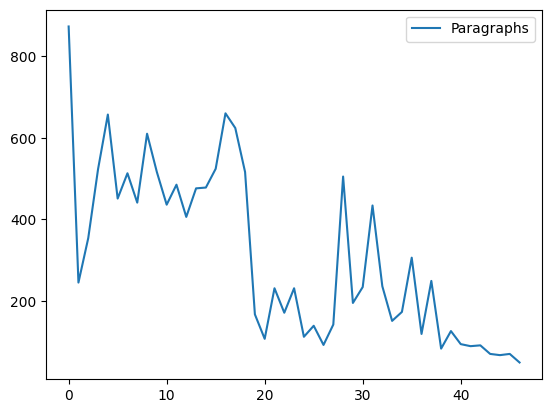

In [918]:
debate_turn_df.loc[0:46].plot(kind='line')

In [919]:
debate_turn_df_latex = debate_turn_df.to_latex(index=False, longtable=True, decimal=',', caption='Number of paragraphs per debate', label='tab:paragraphs_per_debate')

In [920]:
with open(f'{output_directory}/Debate_Paragraph_Table.tex', 'w', encoding='utf8', newline='\n') as file:
    file.write(debate_turn_df_latex)